In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)



In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [2]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
test = pd.read_csv("./data/test.csv", encoding="latin-1")


In [4]:
app_train = train.copy()
app_test = test.copy()
app_train.drop_duplicates(inplace=True)
app_train.drop_duplicates(subset=["ID"], keep='first', inplace=True)


In [5]:
train[train.ID == 2273]


ID      DiagnosticICD10Code SurgeryGroup   AnesthesiaType SurgeryName  \
1221  2273  {nan, 'M20.1', 'I87.2'}   {'B', 'C'}  Spinal Anestezi         NaN   
1871  2273  {nan, 'M20.1', 'I87.2'}   {'B', 'C'}  Spinal Anestezi         NaN   

      Age     Sex           Service  DoctorID  AnaesthetistID  \
1221   60  FEMALE  ORTOPED? SERV?S?        32              11   
1871   60  FEMALE  ORTOPED? SERV?S?        32              11   

      ElapsedTime(second)  
1221                 6474  
1871                 6472

In [6]:
app_train[app_train.ID == 2273]


ID      DiagnosticICD10Code SurgeryGroup   AnesthesiaType SurgeryName  \
1221  2273  {nan, 'M20.1', 'I87.2'}   {'B', 'C'}  Spinal Anestezi         NaN   

      Age     Sex           Service  DoctorID  AnaesthetistID  \
1221   60  FEMALE  ORTOPED? SERV?S?        32              11   

      ElapsedTime(second)  
1221                 6474

In [7]:
app_train_clean = app_train.copy()
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str[1:-1]
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str.replace("'","")
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str[1:-1]
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str.replace("'","")
app_train_clean.head()

ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0  1829                 L05               C  Spinal Anestezi   
1  1104               N20.1               C  Spinal Anestezi   
2  1850               K80.8               B   Genel Anestezi   
3  1059          nan, M51.1            0, B   Genel Anestezi   
4   608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   

                                         SurgeryName  Age     Sex  \
0                                     Pilonidal kist   26    MALE   
1                                                NaN   24    MALE   
2                                Kolelitiazis, di?er   38    MALE   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41  FEMALE   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49  FEMALE   

                 Service  DoctorID  AnaesthetistID  ElapsedTime(second)  
0  GENEL CERRAH? SERV?S?         5              13                 6333  
1        ÜROLOJ? SERV?S?        15               3                 2972  
2  GENEL CERRAH? SERV?S?        36              14                 4647  
3       ORTOPED? SERV?S?        42               6                 4871  
4       ORTOPED? SERV?S?        42               9                 9046

In [8]:
app_test_clean = app_test.copy()
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str[1:-1]
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str.replace("'","")
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str[1:-1]
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str.replace("'","")
app_test_clean.head()

ID DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
0  1669               H26.9            C    Sedo Analjezi   
1  2091               L05.9            C  Spinal Anestezi   
2   585               M50.1           A3   Genel Anestezi   
3  1455               S42.2            B   Genel Anestezi   
4  1801                 I82         0, E    Sedo Analjezi   

                                         SurgeryName  Age     Sex  \
0                                                NaN   70  FEMALE   
1                                     Pilonidal kist   41    MALE   
2       Servikal disk bozukluklar?, radikülopati ile   59  FEMALE   
3                              Humerus üst uç k?r???   54  FEMALE   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50    MALE   

                    Service  DoctorID  AnaesthetistID  
0  GÖZ HASTALIKLARI SERV?S?        49              13  
1     GENEL CERRAH? SERV?S?        36               6  
2          ORTOPED? SERV?S?        42              14  
3          ORTOPED? SERV?S?        23              14  
4               KVC SERV?S?        46              13

In [9]:
app_train_clean['Any_NaN_Diagnos'] = app_train_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)
app_test_clean['Any_NaN_Diagnos'] = app_test_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)

In [10]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

app_train_clean['Diagnos_Clean'] = app_train_clean['DiagnosticICD10Code'].apply(clean_diagnosis)
app_test_clean['Diagnos_Clean'] = app_test_clean['DiagnosticICD10Code'].apply(clean_diagnosis)

In [11]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]
app_train_clean["SurgeryGroup_Encode"] = app_train_clean["SurgeryGroup"].apply(mapper)
app_test_clean["SurgeryGroup_Encode"] = app_test_clean["SurgeryGroup"].apply(mapper)

In [12]:
app_train_clean["SurgeryGroup_Sum"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_train_clean["SurgeryGroup_Count"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_train_clean["SurgeryGroup_Avg"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_train_clean["SurgeryGroup_Std"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_train_clean["SurgeryGroup_Max"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_train_clean["SurgeryGroup_Min"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [13]:
app_test_clean["SurgeryGroup_Sum"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_test_clean["SurgeryGroup_Count"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_test_clean["SurgeryGroup_Avg"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_test_clean["SurgeryGroup_Std"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_test_clean["SurgeryGroup_Max"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_test_clean["SurgeryGroup_Min"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [14]:
app_train_clean[app_train_clean["ID"]==3228]

ID                                DiagnosticICD10Code SurgeryGroup  \
92  3228  K21.9, J15.9, N30.0, N21.1, N30.9, L30.3, N40,...            B   

     AnesthesiaType  SurgeryName  Age   Sex          Service  DoctorID  \
92  Spinal Anestezi  Üretra ta??   68  MALE  ÜROLOJ? SERV?S?        15   

    AnaesthetistID  ElapsedTime(second)  Any_NaN_Diagnos  \
92               2                 4581                0   

                                        Diagnos_Clean SurgeryGroup_Encode  \
92  {J15.9, N30.9, L30.3, N21.1, N30.0, N40, M19.9...                 [4]   

    SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
92                 4                   1               4.0               0.0   

    SurgeryGroup_Max  SurgeryGroup_Min  
92                 4                 4

In [15]:
app_train_clean[app_train_clean["ID"]==245]

ID                   DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
2014  245  K21.9, J15.9, R31, N30.0, M19.9, I10            C  Spinal Anestezi   

     SurgeryName  Age   Sex          Service  DoctorID  AnaesthetistID  \
2014         NaN   71  MALE  ÜROLOJ? SERV?S?        15               2   

      ElapsedTime(second)  Any_NaN_Diagnos  \
2014                 5415                0   

                               Diagnos_Clean SurgeryGroup_Encode  \
2014  {J15.9, I10, R31, N30.0, M19.9, K21.9}                 [3]   

      SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  \
2014                 3                   1               3.0   

      SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  
2014               0.0                 3                 3

In [16]:
app_train_clean.loc[92, "Diagnos_Clean"] = np.nan
app_train_clean.loc[2014, "Diagnos_Clean"] = np.nan

In [17]:
app_train_clean["Diagnos_Clean"] = app_train_clean["Diagnos_Clean"].fillna('')
app_train_clean['Diagnos_Clean'] = app_train_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [18]:
app_test_clean.loc[787, "Diagnos_Clean"] = np.nan
app_test_clean.loc[285, "Diagnos_Clean"] = np.nan

In [19]:
app_test_clean["Diagnos_Clean"] = app_test_clean["Diagnos_Clean"].fillna('')
app_test_clean['Diagnos_Clean'] = app_test_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [20]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools


# function to generate all possible combinations with first characters for a set of diagnoses
def generate_combinations_first_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# function to generate all possible combinations with all characters for a set of diagnoses
def generate_combinations_all_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_train_clean.at[i, col_name] = combo

for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_train_clean.at[i, col_name] = combo

app_train_clean.head()

  0%|          | 0/2714 [00:00<?, ?it/s]

  0%|          | 0/2714 [00:00<?, ?it/s]

ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0  1829                 L05               C  Spinal Anestezi   
1  1104               N20.1               C  Spinal Anestezi   
2  1850               K80.8               B   Genel Anestezi   
3  1059          nan, M51.1            0, B   Genel Anestezi   
4   608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   

                                         SurgeryName  Age     Sex  \
0                                     Pilonidal kist   26    MALE   
1                                                NaN   24    MALE   
2                                Kolelitiazis, di?er   38    MALE   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41  FEMALE   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49  FEMALE   

                 Service  DoctorID  AnaesthetistID  ElapsedTime(second)  \
0  GENEL CERRAH? SERV?S?         5              13                 6333   
1        ÜROLOJ? SERV?S?        15               3                 2972   
2  GENEL CERRAH? SERV?S?        36              14                 4647   
3       ORTOPED? SERV?S?        42               6                 4871   
4       ORTOPED? SERV?S?        42               9                 9046   

   Any_NaN_Diagnos   Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  \
0                0           [L05]                 [3]                 3   
1                0         [N20.1]                 [3]                 3   
2                0         [K80.8]                 [4]                 4   
3                1         [M51.1]              [1, 4]                 5   
4                1  [M48.0, M51.1]     [1, 4, 3, 2, 5]                15   

   SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  \
0                   1               3.0          0.000000                 3   
1                   1               3.0          0.000000                 3   
2                   1               4.0          0.000000                 4   
3                   2               2.5          1.500000                 4   
4                   5               3.0          1.414214                 5   

   SurgeryGroup_Min combination_first_1 combination_first_2  \
0                 3                   L                 NaN   
1                 3                   N                 NaN   
2                 4                   K                 NaN   
3                 1                   M                 NaN   
4                 1                   M                   M   

  combination_first_3 combination_first_4 combination_first_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 M-M                 NaN                 NaN   

  combination_first_6 combination_first_7 combination_first_8  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_9 combination_first_10 combination_first_11  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

  combination_first_12 combination_first_13 combination_first_14  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN           

In [21]:
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_test_clean.at[i, col_name] = combo

for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_test_clean.at[i, col_name] = combo

app_test_clean.head()

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1211 [00:00<?, ?it/s]

ID DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
0  1669               H26.9            C    Sedo Analjezi   
1  2091               L05.9            C  Spinal Anestezi   
2   585               M50.1           A3   Genel Anestezi   
3  1455               S42.2            B   Genel Anestezi   
4  1801                 I82         0, E    Sedo Analjezi   

                                         SurgeryName  Age     Sex  \
0                                                NaN   70  FEMALE   
1                                     Pilonidal kist   41    MALE   
2       Servikal disk bozukluklar?, radikülopati ile   59  FEMALE   
3                              Humerus üst uç k?r???   54  FEMALE   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50    MALE   

                    Service  DoctorID  AnaesthetistID  Any_NaN_Diagnos  \
0  GÖZ HASTALIKLARI SERV?S?        49              13                0   
1     GENEL CERRAH? SERV?S?        36               6                0   
2          ORTOPED? SERV?S?        42              14                0   
3          ORTOPED? SERV?S?        23              14                0   
4               KVC SERV?S?        46              13                0   

  Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  SurgeryGroup_Count  \
0       [H26.9]                 [3]                 3                   1   
1       [L05.9]                 [3]                 3                   1   
2       [M50.1]                 [5]                 5                   1   
3       [S42.2]                 [4]                 4                   1   
4         [I82]              [1, 1]                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

  combination_first_1 combination_first_2 combination_first_3  \
0                   H                 NaN                 NaN   
1                   L                 NaN                 NaN   
2                   M                 NaN                 NaN   
3                   S                 NaN                 NaN   
4                   I                 NaN                 NaN   

  combination_first_4 combination_first_5 combination_first_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_7 combination_first_8 combination_first_9  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_10 combination_first_11 combination_first_12  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  combination_first_13 combination_first_14 combination_first_15  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN  

In [22]:
app_train_encode = app_train_clean.copy()
app_test_encode = app_test_clean.copy()


In [23]:
app_train_encode['Age_Range'] = pd.cut(app_train_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])
app_test_encode['Age_Range'] = pd.cut(app_test_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [24]:
app_train_encode.head()

ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0  1829                 L05               C  Spinal Anestezi   
1  1104               N20.1               C  Spinal Anestezi   
2  1850               K80.8               B   Genel Anestezi   
3  1059          nan, M51.1            0, B   Genel Anestezi   
4   608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   

                                         SurgeryName  Age     Sex  \
0                                     Pilonidal kist   26    MALE   
1                                                NaN   24    MALE   
2                                Kolelitiazis, di?er   38    MALE   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41  FEMALE   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49  FEMALE   

                 Service  DoctorID  AnaesthetistID  ElapsedTime(second)  \
0  GENEL CERRAH? SERV?S?         5              13                 6333   
1        ÜROLOJ? SERV?S?        15               3                 2972   
2  GENEL CERRAH? SERV?S?        36              14                 4647   
3       ORTOPED? SERV?S?        42               6                 4871   
4       ORTOPED? SERV?S?        42               9                 9046   

   Any_NaN_Diagnos   Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  \
0                0           [L05]                 [3]                 3   
1                0         [N20.1]                 [3]                 3   
2                0         [K80.8]                 [4]                 4   
3                1         [M51.1]              [1, 4]                 5   
4                1  [M48.0, M51.1]     [1, 4, 3, 2, 5]                15   

   SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  \
0                   1               3.0          0.000000                 3   
1                   1               3.0          0.000000                 3   
2                   1               4.0          0.000000                 4   
3                   2               2.5          1.500000                 4   
4                   5               3.0          1.414214                 5   

   SurgeryGroup_Min combination_first_1 combination_first_2  \
0                 3                   L                 NaN   
1                 3                   N                 NaN   
2                 4                   K                 NaN   
3                 1                   M                 NaN   
4                 1                   M                   M   

  combination_first_3 combination_first_4 combination_first_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 M-M                 NaN                 NaN   

  combination_first_6 combination_first_7 combination_first_8  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_9 combination_first_10 combination_first_11  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

  combination_first_12 combination_first_13 combination_first_14  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN           

In [25]:
app_test_encode.head()


ID DiagnosticICD10Code SurgeryGroup   AnesthesiaType  \
0  1669               H26.9            C    Sedo Analjezi   
1  2091               L05.9            C  Spinal Anestezi   
2   585               M50.1           A3   Genel Anestezi   
3  1455               S42.2            B   Genel Anestezi   
4  1801                 I82         0, E    Sedo Analjezi   

                                         SurgeryName  Age     Sex  \
0                                                NaN   70  FEMALE   
1                                     Pilonidal kist   41    MALE   
2       Servikal disk bozukluklar?, radikülopati ile   59  FEMALE   
3                              Humerus üst uç k?r???   54  FEMALE   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50    MALE   

                    Service  DoctorID  AnaesthetistID  Any_NaN_Diagnos  \
0  GÖZ HASTALIKLARI SERV?S?        49              13                0   
1     GENEL CERRAH? SERV?S?        36               6                0   
2          ORTOPED? SERV?S?        42              14                0   
3          ORTOPED? SERV?S?        23              14                0   
4               KVC SERV?S?        46              13                0   

  Diagnos_Clean SurgeryGroup_Encode  SurgeryGroup_Sum  SurgeryGroup_Count  \
0       [H26.9]                 [3]                 3                   1   
1       [L05.9]                 [3]                 3                   1   
2       [M50.1]                 [5]                 5                   1   
3       [S42.2]                 [4]                 4                   1   
4         [I82]              [1, 1]                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

  combination_first_1 combination_first_2 combination_first_3  \
0                   H                 NaN                 NaN   
1                   L                 NaN                 NaN   
2                   M                 NaN                 NaN   
3                   S                 NaN                 NaN   
4                   I                 NaN                 NaN   

  combination_first_4 combination_first_5 combination_first_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_7 combination_first_8 combination_first_9  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  combination_first_10 combination_first_11 combination_first_12  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  combination_first_13 combination_first_14 combination_first_15  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN  

In [26]:
train_ohe_cols = list(app_train_encode.columns[3:4]) + list(app_train_encode.columns[6:10]) + list(app_train_encode.columns[20:])
test_ohe_cols = list(app_test_encode.columns[3:4]) + list(app_test_encode.columns[6:10]) + list(app_test_encode.columns[19:])


In [27]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [28]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)



In [29]:
app_train_encode.head()

SurgeryName  Age  \
0                                     Pilonidal kist   26   
1                                                NaN   24   
2                                Kolelitiazis, di?er   38   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49   

   ElapsedTime(second)  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0                 6333                0                 3                   1   
1                 2972                0                 3                   1   
2                 4647                0                 4                   1   
3                 4871                1                 5                   2   
4                 9046                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Periferik Bloklar  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   AnesthesiaType_Periferik Bloklar ve Genel Anestezi  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   AnesthesiaType_Rejyonel Sinir Blo?u  AnesthesiaType_Sedo Analjezi  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   AnesthesiaType_Seçilmemi?  AnesthesiaType_Spinal Anestezi  \
0                          0                               1   
1                          0                               1   
2                          0                               0   
3                          0                               0   
4                          0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         

In [30]:
app_train_encode["SurgeryName"] = app_train_encode["SurgeryName"].str.strip()

In [31]:
app_test_encode["SurgeryName"] = app_test_encode["SurgeryName"].str.strip()


In [32]:
app_train_encode.shape

(2714, 1752)

In [33]:
app_test_encode.shape

(1211, 1348)

In [34]:
target = app_train_encode["ElapsedTime(second)"]
app_train_encode, app_test_encode = app_train_encode.align(app_test_encode, join = 'inner', axis = 1)

In [35]:
app_train_encode["ElapsedTime(second)"] = target


In [36]:
app_train_encode.shape

(2714, 1347)

In [37]:
app_test_encode.shape

(1211, 1346)

In [38]:
app_train_encode.to_csv("academy_encoding_train.csv", index=False)
app_test_encode.to_csv("academy_encoding_test.csv", index=False)

In [2]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
test = pd.read_csv("./data/test.csv", encoding="latin-1")

In [3]:
app_train_encode = pd.read_csv("academy_encoding_train.csv")
app_test_encode = pd.read_csv("academy_encoding_test.csv")

In [4]:
app_train_encode.shape

(2714, 1347)

In [5]:
app_test_encode.shape

(1211, 1346)

In [6]:
def encode_test(surgery_train):
    from sklearn.model_selection import KFold
    import xgboost as xgb
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import re


    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    y = surgery_train["ElapsedTime(second)"]
    X = surgery_train.drop(columns=["ElapsedTime(second)"])
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

    mse_errs = []
    rmse_errs = []
    mae_errs = []
    r2_errs = []

    models = []

    kf = KFold(n_splits=10, shuffle=True, random_state= 42)

    for split_train, split_val in list(kf.split(X)):
        
        split_train = X.index[split_train]
        split_val = X.index[split_val]
        
        X_train, y_train = X.loc[split_train], y.loc[split_train]
        X_val, y_val = X.loc[split_val], y.loc[split_val]
        print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
        

        model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse')
        
        preds = model.predict(X_val)
        
        rmse_err = mean_squared_error(y_val, preds, squared=False)
        print("Fold RMSE: ", rmse_err)
        rmse_errs.append(rmse_err)

        mse_err = mean_squared_error(y_val, preds)
        print("Fold MSE: ", mse_err)
        mse_errs.append(mse_err)

        mae_err = mean_absolute_error(y_val, preds)
        print("Fold MAE: ", mae_err)
        mae_errs.append(mae_err)

        r2_err = r2_score(y_val, preds)
        print("Fold R2: ", r2_err)
        r2_errs.append(r2_err)

        models.append(model)
        
        print("\n", "*"*70, "\n")

    import plotly.express as px
    importance = [model.feature_importances_ for model in models]

    f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                            pd.Series(np.mean(importance,axis=0),name="Importance")],
                            axis=1).sort_values(by='Importance',
                                                ascending=True)

    fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
    fig.update_layout(
        title_text="First 20 Important Features - XGB Average of Folds"
    )
    fig.show()
    return models

In [7]:
def encode_submission(surgery_test, models):
    user_id = test["ID"]

    model_preds = [model.predict(surgery_test) for model in models]
    model_preds

    sample_submission = pd.DataFrame()
    sample_submission['ID'] = user_id
    sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

    return sample_submission


## Encoding SurgeryName

In [5]:
import category_encoders as ce


### Catboost Encode

In [6]:
catboost_train = app_train_encode.copy()
catboost_test = app_test_encode.copy()

In [7]:
target_train = catboost_train['ElapsedTime(second)']
train_surgeries = catboost_train["SurgeryName"]
test_surgeries = catboost_test["SurgeryName"]

In [8]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(train_surgeries, target_train)
surgeries_catboost_train = cbe_encoder.transform(train_surgeries)
surgeries_catboost_test = cbe_encoder.transform(test_surgeries)

In [9]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [10]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [11]:
catboost_train["SurgeryName"] = surgeries_catboost_train

In [12]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3063.327529   26                0                 3                   1   
1  4701.867577   24                0                 3                   1   
2  4427.350276   38                0                 4                   1   
3  7993.027213   41                1                 5                   2   
4  7993.027213   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [13]:
catboost_test.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                                NaN   70                0   
1                                     Pilonidal kist   41                0   
2       Servikal disk bozukluklar?, radikülopati ile   59                0   
3                              Humerus üst uç k?r???   54                0   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50                0   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0               0.0   
1                 3                   1               3.0               0.0   
2                 5                   1               5.0               0.0   
3                 4                   1               4.0               0.0   
4                 2                   2               1.0               0.0   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 5                 5                                 0   
3                 4                 4                                 0   
4                 1                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                       

In [14]:
catboost_test["SurgeryName"] = surgeries_catboost_test

In [15]:
catboost_test.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  4701.867577   70                0                 3                   1   
1  3063.327529   41                0                 3                   1   
2  7667.902609   59                0                 5                   1   
3  6566.952469   54                0                 4                   1   
4  2422.370887   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [16]:
catboost_train.shape


(2714, 1347)

In [17]:
catboost_test.shape

(1211, 1346)

In [19]:
models = encode_test(catboost_train)

Train shape: (2442, 1346) | Val Shape: (272, 1346)


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-rmse:4111.88838	validation_1-rmse:3965.69667
[1]	validation_0-rmse:3113.76606	validation_1-rmse:3008.47188
[2]	validation_0-rmse:2485.46778	validation_1-rmse:2370.53581
[3]	validation_0-rmse:2088.09074	validation_1-rmse:1953.87323
[4]	validation_0-rmse:1857.32538	validation_1-rmse:1686.83558
[5]	validation_0-rmse:1716.87680	validation_1-rmse:1526.76502
[6]	validation_0-rmse:1644.19745	validation_1-rmse:1413.56059
[7]	validation_0-rmse:1594.23665	validation_1-rmse:1347.33008
[8]	validation_0-rmse:1565.20616	validation_1-rmse:1297.95939
[9]	validation_0-rmse:1539.69869	validation_1-rmse:1258.52986
[10]	validation_0-rmse:1533.31439	validation_1-rmse:1242.62421
[11]	validation_0-rmse:1524.94633	validation_1-rmse:1218.86867
[12]	validation_0-rmse:1522.48525	validation_1-rmse:1208.72829
[13]	validation_0-rmse:1515.87096	validation_1-rmse:1200.78898
[14]	validation_0-rmse:1514.48746	validation_1-rmse:1182.92474
[15]	validation_0-rmse:1514.05135	validation_1-rmse:1177.67032
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2878.19232	validation_1-rmse:2320.48909
[3]	validation_0-rmse:2452.55075	validation_1-rmse:1906.21174
[4]	validation_0-rmse:2188.54898	validation_1-rmse:1636.22967
[5]	validation_0-rmse:2043.75035	validation_1-rmse:1477.74252
[6]	validation_0-rmse:1952.16838	validation_1-rmse:1371.52163
[7]	validation_0-rmse:1879.01180	validation_1-rmse:1300.55963
[8]	validation_0-rmse:1830.31732	validation_1-rmse:1247.76205
[9]	validation_0-rmse:1802.28088	validation_1-rmse:1213.14801
[10]	validation_0-rmse:1784.79895	validation_1-rmse:1189.20636
[11]	validation_0-rmse:1769.32354	validation_1-rmse:1169.22062
[12]	validation_0-rmse:1763.16109	validation_1-rmse:1161.70385
[13]	validation_0-rmse:1761.16550	validation_1-rmse:1140.90051
[14]	validation_0-rmse:1752.17245	validation_1-rmse:1134.52151
[15]	validation_0-rmse:1740.36792	validation_1-rmse:1119.32658
[16]	validation_0-rmse:1739.39010	validation_1-rmse:1113.45186
[17]	validation_0-rmse:1741.77294	validation_1-rmse:1109.92565


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[1]	validation_0-rmse:2978.94028	validation_1-rmse:3008.41972
[2]	validation_0-rmse:2360.24495	validation_1-rmse:2368.53603
[3]	validation_0-rmse:1987.48902	validation_1-rmse:1952.20259
[4]	validation_0-rmse:1762.27142	validation_1-rmse:1688.82474
[5]	validation_0-rmse:1642.84990	validation_1-rmse:1524.61426
[6]	validation_0-rmse:1574.03879	validation_1-rmse:1404.42984
[7]	validation_0-rmse:1545.01774	validation_1-rmse:1340.52867
[8]	validation_0-rmse:1524.17836	validation_1-rmse:1282.16077
[9]	validation_0-rmse:1503.50635	validation_1-rmse:1242.71259
[10]	validation_0-rmse:1495.83506	validation_1-rmse:1213.76516
[11]	validation_0-rmse:1496.68368	validation_1-rmse:1194.79309
[12]	validation_0-rmse:1498.40809	validation_1-rmse:1177.61595
[13]	validation_0-rmse:1485.80091	validation_1-rmse:1167.19615
[14]	validation_0-rmse:1480.77590	validation_1-rmse:1154.61938
[15]	validation_0-rmse:1477.93249	validation_1-rmse:1148.11991
[16]	validation_0-rmse:1475.73396	validation_1-rmse:1140.16281
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2156.96559	validation_1-rmse:2371.77511
[3]	validation_0-rmse:1811.42398	validation_1-rmse:1949.67148
[4]	validation_0-rmse:1621.00857	validation_1-rmse:1675.50858
[5]	validation_0-rmse:1497.09597	validation_1-rmse:1509.58600
[6]	validation_0-rmse:1467.80899	validation_1-rmse:1405.13623
[7]	validation_0-rmse:1455.97317	validation_1-rmse:1339.70295
[8]	validation_0-rmse:1448.07202	validation_1-rmse:1293.51692
[9]	validation_0-rmse:1442.31576	validation_1-rmse:1258.41045
[10]	validation_0-rmse:1452.56523	validation_1-rmse:1230.20928
[11]	validation_0-rmse:1452.68969	validation_1-rmse:1200.55424
[12]	validation_0-rmse:1452.54957	validation_1-rmse:1179.29488
[13]	validation_0-rmse:1465.16010	validation_1-rmse:1167.21592
[14]	validation_0-rmse:1463.11707	validation_1-rmse:1157.70674
[15]	validation_0-rmse:1464.97645	validation_1-rmse:1149.51408
[16]	validation_0-rmse:1460.82354	validation_1-rmse:1136.40475
[17]	validation_0-rmse:1456.72706	validation_1-rmse:1128.85220


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2102.16729	validation_1-rmse:2390.19163
[3]	validation_0-rmse:1769.42203	validation_1-rmse:1974.28530
[4]	validation_0-rmse:1596.91568	validation_1-rmse:1707.36660
[5]	validation_0-rmse:1510.46909	validation_1-rmse:1542.18242
[6]	validation_0-rmse:1484.14575	validation_1-rmse:1435.59914
[7]	validation_0-rmse:1481.19050	validation_1-rmse:1359.95139
[8]	validation_0-rmse:1467.71985	validation_1-rmse:1315.15930
[9]	validation_0-rmse:1471.37650	validation_1-rmse:1279.99396
[10]	validation_0-rmse:1471.86020	validation_1-rmse:1250.39070
[11]	validation_0-rmse:1467.81818	validation_1-rmse:1229.29969
[12]	validation_0-rmse:1469.86508	validation_1-rmse:1220.14019
[13]	validation_0-rmse:1470.53397	validation_1-rmse:1212.00734
[14]	validation_0-rmse:1472.05651	validation_1-rmse:1202.13734
[15]	validation_0-rmse:1474.53465	validation_1-rmse:1197.18487
[16]	validation_0-rmse:1467.40257	validation_1-rmse:1168.59059
[17]	validation_0-rmse:1469.68427	validation_1-rmse:1157.31846


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[1]	validation_0-rmse:3059.84143	validation_1-rmse:3018.78560
[2]	validation_0-rmse:2465.64366	validation_1-rmse:2357.83030
[3]	validation_0-rmse:2106.96992	validation_1-rmse:1940.57903
[4]	validation_0-rmse:1907.07525	validation_1-rmse:1676.31587
[5]	validation_0-rmse:1795.00349	validation_1-rmse:1501.87152
[6]	validation_0-rmse:1735.52700	validation_1-rmse:1399.19863
[7]	validation_0-rmse:1695.00032	validation_1-rmse:1336.06631
[8]	validation_0-rmse:1669.55978	validation_1-rmse:1284.61870
[9]	validation_0-rmse:1656.56318	validation_1-rmse:1239.58494
[10]	validation_0-rmse:1649.76968	validation_1-rmse:1217.62881
[11]	validation_0-rmse:1646.86749	validation_1-rmse:1201.08322
[12]	validation_0-rmse:1641.57322	validation_1-rmse:1185.97351
[13]	validation_0-rmse:1637.70801	validation_1-rmse:1171.72329
[14]	validation_0-rmse:1632.93562	validation_1-rmse:1165.39019
[15]	validation_0-rmse:1630.02196	validation_1-rmse:1156.27094
[16]	validation_0-rmse:1634.10709	validation_1-rmse:1149.75845
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2694.47978	validation_1-rmse:2355.02355
[3]	validation_0-rmse:2335.52641	validation_1-rmse:1930.37452
[4]	validation_0-rmse:2124.69743	validation_1-rmse:1676.36097
[5]	validation_0-rmse:1999.93195	validation_1-rmse:1501.97079
[6]	validation_0-rmse:1929.96619	validation_1-rmse:1398.98805
[7]	validation_0-rmse:1885.77919	validation_1-rmse:1328.29215
[8]	validation_0-rmse:1866.99334	validation_1-rmse:1287.66124
[9]	validation_0-rmse:1839.34988	validation_1-rmse:1245.93521
[10]	validation_0-rmse:1846.27036	validation_1-rmse:1213.22187
[11]	validation_0-rmse:1834.80874	validation_1-rmse:1193.80669
[12]	validation_0-rmse:1821.49219	validation_1-rmse:1176.58544
[13]	validation_0-rmse:1826.23860	validation_1-rmse:1160.52359
[14]	validation_0-rmse:1823.00556	validation_1-rmse:1149.05006
[15]	validation_0-rmse:1819.39897	validation_1-rmse:1141.47451
[16]	validation_0-rmse:1819.15112	validation_1-rmse:1137.36967
[17]	validation_0-rmse:1815.78542	validation_1-rmse:1132.51248


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2523.30139	validation_1-rmse:2362.64772
[3]	validation_0-rmse:2132.13565	validation_1-rmse:1947.85698
[4]	validation_0-rmse:1879.75347	validation_1-rmse:1669.81294
[5]	validation_0-rmse:1711.75274	validation_1-rmse:1501.02892
[6]	validation_0-rmse:1632.30420	validation_1-rmse:1390.13046
[7]	validation_0-rmse:1590.23173	validation_1-rmse:1331.30149
[8]	validation_0-rmse:1574.26565	validation_1-rmse:1281.89064
[9]	validation_0-rmse:1567.71960	validation_1-rmse:1249.26562
[10]	validation_0-rmse:1563.65247	validation_1-rmse:1224.48570
[11]	validation_0-rmse:1553.98852	validation_1-rmse:1209.10321
[12]	validation_0-rmse:1546.92902	validation_1-rmse:1192.71837
[13]	validation_0-rmse:1547.09435	validation_1-rmse:1179.98924
[14]	validation_0-rmse:1542.02562	validation_1-rmse:1163.47237
[15]	validation_0-rmse:1532.95416	validation_1-rmse:1157.10849
[16]	validation_0-rmse:1532.87643	validation_1-rmse:1151.82133
[17]	validation_0-rmse:1532.37524	validation_1-rmse:1139.10715


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2263.73798	validation_1-rmse:2373.70113
[3]	validation_0-rmse:1945.52254	validation_1-rmse:1945.20010
[4]	validation_0-rmse:1767.78123	validation_1-rmse:1688.00150
[5]	validation_0-rmse:1647.48171	validation_1-rmse:1508.56114
[6]	validation_0-rmse:1592.70132	validation_1-rmse:1393.07849
[7]	validation_0-rmse:1568.62614	validation_1-rmse:1330.19195
[8]	validation_0-rmse:1545.23377	validation_1-rmse:1279.91270
[9]	validation_0-rmse:1504.48399	validation_1-rmse:1229.29843
[10]	validation_0-rmse:1503.77122	validation_1-rmse:1207.12756
[11]	validation_0-rmse:1488.56580	validation_1-rmse:1182.54457
[12]	validation_0-rmse:1483.35182	validation_1-rmse:1166.66321
[13]	validation_0-rmse:1482.33410	validation_1-rmse:1155.16655
[14]	validation_0-rmse:1476.41238	validation_1-rmse:1136.50906
[15]	validation_0-rmse:1478.60460	validation_1-rmse:1130.42626
[16]	validation_0-rmse:1485.98330	validation_1-rmse:1120.85817
[17]	validation_0-rmse:1484.89954	validation_1-rmse:1112.20742


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[1]	validation_0-rmse:3205.22693	validation_1-rmse:3010.85238
[2]	validation_0-rmse:2560.88395	validation_1-rmse:2356.95021
[3]	validation_0-rmse:2164.47258	validation_1-rmse:1933.74795
[4]	validation_0-rmse:1969.97794	validation_1-rmse:1670.60241
[5]	validation_0-rmse:1834.13034	validation_1-rmse:1494.79697
[6]	validation_0-rmse:1755.31783	validation_1-rmse:1398.10588
[7]	validation_0-rmse:1711.53285	validation_1-rmse:1322.56317
[8]	validation_0-rmse:1675.41399	validation_1-rmse:1276.12332
[9]	validation_0-rmse:1656.45297	validation_1-rmse:1236.42171
[10]	validation_0-rmse:1644.39307	validation_1-rmse:1211.87218
[11]	validation_0-rmse:1641.55188	validation_1-rmse:1189.81055
[12]	validation_0-rmse:1643.67156	validation_1-rmse:1172.44128
[13]	validation_0-rmse:1641.86702	validation_1-rmse:1160.72656
[14]	validation_0-rmse:1632.91651	validation_1-rmse:1142.12733
[15]	validation_0-rmse:1629.20587	validation_1-rmse:1136.71689
[16]	validation_0-rmse:1629.56098	validation_1-rmse:1128.92463
[

In [21]:
catboost_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3063.327529   26                0                 3                   1   
1  4701.867577   24                0                 3                   1   
2  4427.350276   38                0                 4                   1   
3  7993.027213   41                1                 5                   2   
4  7993.027213   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [25]:
sample_submission = encode_submission(catboost_test, models)

In [26]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2824
1  2091                 2369
2   585                 7872
3  1455                 8000
4  1801                 2325

In [27]:
sample_submission.shape

(1211, 2)

In [28]:
sample_submission.to_csv("mentorship_surgeryname_catboost_encode_v2.csv", index = False)

### Target Encode

In [29]:
target_encode_train = app_train_encode.copy()
target_encode_test = app_test_encode.copy()

In [30]:
target_train = target_encode_train['ElapsedTime(second)']
train_surgeries = target_encode_train["SurgeryName"]
test_surgeries = target_encode_test["SurgeryName"]

In [31]:
target_enc = ce.target_encoder.TargetEncoder()
target_enc.fit(train_surgeries, target_train)
surgeries_target_train = target_enc.transform(train_surgeries)
surgeries_target_test = target_enc.transform(test_surgeries)

In [32]:
target_encode_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [33]:
target_encode_train["SurgeryName"] = surgeries_target_train

In [34]:
target_encode_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3048.907498   26                0                 3                   1   
1  4702.453521   24                0                 3                   1   
2  4427.028986   38                0                 4                   1   
3  8025.878841   41                1                 5                   2   
4  8025.878841   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [35]:
target_encode_test.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                                NaN   70                0   
1                                     Pilonidal kist   41                0   
2       Servikal disk bozukluklar?, radikülopati ile   59                0   
3                              Humerus üst uç k?r???   54                0   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50                0   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0               0.0   
1                 3                   1               3.0               0.0   
2                 5                   1               5.0               0.0   
3                 4                   1               4.0               0.0   
4                 2                   2               1.0               0.0   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 5                 5                                 0   
3                 4                 4                                 0   
4                 1                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                       

In [36]:
target_encode_test["SurgeryName"] = surgeries_target_test

In [37]:
target_encode_test.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  4702.453521   70                0                 3                   1   
1  3048.907498   41                0                 3                   1   
2  6239.513062   59                0                 5                   1   
3  4934.963519   54                0                 4                   1   
4  2416.741848   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [38]:
target_encode_train.shape


(2714, 1347)

In [39]:
target_encode_test.shape

(1211, 1346)

In [40]:
models = encode_test(target_encode_train)

Train shape: (2442, 1346) | Val Shape: (272, 1346)
[0]	validation_0-rmse:4101.17440	validation_1-rmse:3967.25983


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3104.44030	validation_1-rmse:3005.71130
[2]	validation_0-rmse:2484.24329	validation_1-rmse:2356.80898
[3]	validation_0-rmse:2062.60788	validation_1-rmse:1934.76700
[4]	validation_0-rmse:1831.93966	validation_1-rmse:1648.88755
[5]	validation_0-rmse:1702.93385	validation_1-rmse:1483.88866
[6]	validation_0-rmse:1623.81206	validation_1-rmse:1370.40822
[7]	validation_0-rmse:1568.10485	validation_1-rmse:1307.02604
[8]	validation_0-rmse:1532.31367	validation_1-rmse:1254.71296
[9]	validation_0-rmse:1508.90214	validation_1-rmse:1217.81820
[10]	validation_0-rmse:1506.25624	validation_1-rmse:1196.33190
[11]	validation_0-rmse:1502.56122	validation_1-rmse:1169.08913
[12]	validation_0-rmse:1513.39339	validation_1-rmse:1159.28713
[13]	validation_0-rmse:1518.09964	validation_1-rmse:1147.81442
[14]	validation_0-rmse:1506.51321	validation_1-rmse:1137.97508
[15]	validation_0-rmse:1505.80721	validation_1-rmse:1126.91527
[16]	validation_0-rmse:1514.23499	validation_1-rmse:1117.49158
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2795.26652	validation_1-rmse:2325.37678
[3]	validation_0-rmse:2347.86376	validation_1-rmse:1918.30653
[4]	validation_0-rmse:2063.58951	validation_1-rmse:1647.54798
[5]	validation_0-rmse:1887.40416	validation_1-rmse:1472.27102
[6]	validation_0-rmse:1782.77539	validation_1-rmse:1367.70628
[7]	validation_0-rmse:1703.14122	validation_1-rmse:1284.04764
[8]	validation_0-rmse:1656.98437	validation_1-rmse:1229.55319
[9]	validation_0-rmse:1613.98842	validation_1-rmse:1188.38949
[10]	validation_0-rmse:1604.16798	validation_1-rmse:1170.83281
[11]	validation_0-rmse:1596.03516	validation_1-rmse:1154.82840
[12]	validation_0-rmse:1582.80182	validation_1-rmse:1129.07723
[13]	validation_0-rmse:1571.14138	validation_1-rmse:1117.05023
[14]	validation_0-rmse:1564.87416	validation_1-rmse:1099.06581
[15]	validation_0-rmse:1569.83521	validation_1-rmse:1087.18545
[16]	validation_0-rmse:1569.01213	validation_1-rmse:1081.75156
[17]	validation_0-rmse:1563.60548	validation_1-rmse:1077.92239


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2285.66589	validation_1-rmse:2367.20115
[3]	validation_0-rmse:1906.29921	validation_1-rmse:1936.79629
[4]	validation_0-rmse:1710.16848	validation_1-rmse:1665.77963
[5]	validation_0-rmse:1586.54846	validation_1-rmse:1493.25530
[6]	validation_0-rmse:1557.74663	validation_1-rmse:1379.24026
[7]	validation_0-rmse:1544.54672	validation_1-rmse:1312.35361
[8]	validation_0-rmse:1535.73661	validation_1-rmse:1256.53694
[9]	validation_0-rmse:1527.01113	validation_1-rmse:1230.29152
[10]	validation_0-rmse:1520.52327	validation_1-rmse:1206.60376
[11]	validation_0-rmse:1518.85065	validation_1-rmse:1176.64961
[12]	validation_0-rmse:1517.27474	validation_1-rmse:1166.83374
[13]	validation_0-rmse:1508.64015	validation_1-rmse:1149.29091
[14]	validation_0-rmse:1516.60310	validation_1-rmse:1138.37125
[15]	validation_0-rmse:1520.04048	validation_1-rmse:1131.14867
[16]	validation_0-rmse:1510.88038	validation_1-rmse:1104.05492
[17]	validation_0-rmse:1510.88522	validation_1-rmse:1099.75796


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:2796.57971	validation_1-rmse:3010.85657
[2]	validation_0-rmse:2212.93284	validation_1-rmse:2357.05327
[3]	validation_0-rmse:1872.01521	validation_1-rmse:1927.09821
[4]	validation_0-rmse:1696.70203	validation_1-rmse:1646.58862
[5]	validation_0-rmse:1597.22569	validation_1-rmse:1471.77805
[6]	validation_0-rmse:1576.33220	validation_1-rmse:1351.27916
[7]	validation_0-rmse:1563.48014	validation_1-rmse:1286.42787
[8]	validation_0-rmse:1559.79618	validation_1-rmse:1236.34993
[9]	validation_0-rmse:1556.27145	validation_1-rmse:1194.28757
[10]	validation_0-rmse:1541.33671	validation_1-rmse:1148.39425
[11]	validation_0-rmse:1535.08452	validation_1-rmse:1139.25960
[12]	validation_0-rmse:1536.43146	validation_1-rmse:1127.08918
[13]	validation_0-rmse:1524.06345	validation_1-rmse:1109.32366
[14]	validation_0-rmse:1521.69012	validation_1-rmse:1096.32855
[15]	validation_0-rmse:1519.48774	validation_1-rmse:1085.95202
[16]	validation_0-rmse:1516.53904	validation_1-rmse:1077.75474
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-rmse:3628.18554	validation_1-rmse:4012.85047
[1]	validation_0-rmse:2735.47052	validation_1-rmse:3028.51012
[2]	validation_0-rmse:2123.96048	validation_1-rmse:2377.08908
[3]	validation_0-rmse:1784.29613	validation_1-rmse:1951.81799
[4]	validation_0-rmse:1583.90748	validation_1-rmse:1687.15016
[5]	validation_0-rmse:1465.50933	validation_1-rmse:1505.38552
[6]	validation_0-rmse:1396.53101	validation_1-rmse:1400.99539
[7]	validation_0-rmse:1363.50942	validation_1-rmse:1327.61970
[8]	validation_0-rmse:1348.29269	validation_1-rmse:1283.68747
[9]	validation_0-rmse:1337.26185	validation_1-rmse:1250.82661
[10]	validation_0-rmse:1340.14676	validation_1-rmse:1207.94999
[11]	validation_0-rmse:1335.36263	validation_1-rmse:1184.45215
[12]	validation_0-rmse:1331.45382	validation_1-rmse:1170.41266
[13]	validation_0-rmse:1329.71252	validation_1-rmse:1163.23341
[14]	validation_0-rmse:1335.21810	validation_1-rmse:1154.41817
[15]	validation_0-rmse:1332.45070	validation_1-rmse:1146.55537
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2420.02219	validation_1-rmse:2355.00681
[3]	validation_0-rmse:2071.13270	validation_1-rmse:1933.17787
[4]	validation_0-rmse:1880.07421	validation_1-rmse:1652.13598
[5]	validation_0-rmse:1770.34581	validation_1-rmse:1484.34731
[6]	validation_0-rmse:1693.66790	validation_1-rmse:1369.69142
[7]	validation_0-rmse:1654.75863	validation_1-rmse:1299.57782
[8]	validation_0-rmse:1599.08900	validation_1-rmse:1250.71369
[9]	validation_0-rmse:1592.80533	validation_1-rmse:1221.02757
[10]	validation_0-rmse:1582.21531	validation_1-rmse:1187.52238
[11]	validation_0-rmse:1576.18800	validation_1-rmse:1169.50615
[12]	validation_0-rmse:1572.93781	validation_1-rmse:1152.47796
[13]	validation_0-rmse:1568.92698	validation_1-rmse:1145.18076
[14]	validation_0-rmse:1564.52473	validation_1-rmse:1139.16968
[15]	validation_0-rmse:1564.90565	validation_1-rmse:1133.85695
[16]	validation_0-rmse:1565.79738	validation_1-rmse:1124.85104
[17]	validation_0-rmse:1565.15948	validation_1-rmse:1121.13031


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2576.26607	validation_1-rmse:2337.31676
[3]	validation_0-rmse:2168.40227	validation_1-rmse:1904.81513
[4]	validation_0-rmse:1959.65932	validation_1-rmse:1635.37628
[5]	validation_0-rmse:1835.33301	validation_1-rmse:1465.63226
[6]	validation_0-rmse:1766.21168	validation_1-rmse:1352.68872
[7]	validation_0-rmse:1709.06541	validation_1-rmse:1285.42578
[8]	validation_0-rmse:1696.54010	validation_1-rmse:1240.91411
[9]	validation_0-rmse:1664.02830	validation_1-rmse:1204.78100
[10]	validation_0-rmse:1657.58384	validation_1-rmse:1181.15347
[11]	validation_0-rmse:1652.75340	validation_1-rmse:1159.68415
[12]	validation_0-rmse:1643.10519	validation_1-rmse:1135.60039
[13]	validation_0-rmse:1643.66788	validation_1-rmse:1129.46408
[14]	validation_0-rmse:1647.65913	validation_1-rmse:1119.31286
[15]	validation_0-rmse:1635.32841	validation_1-rmse:1107.21830
[16]	validation_0-rmse:1635.45143	validation_1-rmse:1101.65181
[17]	validation_0-rmse:1634.90921	validation_1-rmse:1098.38733


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2477.93576	validation_1-rmse:2345.38180
[3]	validation_0-rmse:2063.29581	validation_1-rmse:1922.37724
[4]	validation_0-rmse:1801.79681	validation_1-rmse:1651.68028
[5]	validation_0-rmse:1675.25665	validation_1-rmse:1489.75294
[6]	validation_0-rmse:1603.65518	validation_1-rmse:1383.83306
[7]	validation_0-rmse:1560.27588	validation_1-rmse:1319.07697
[8]	validation_0-rmse:1540.85704	validation_1-rmse:1258.07808
[9]	validation_0-rmse:1538.08097	validation_1-rmse:1227.97007
[10]	validation_0-rmse:1529.43856	validation_1-rmse:1191.20568
[11]	validation_0-rmse:1518.31868	validation_1-rmse:1177.64112
[12]	validation_0-rmse:1509.01501	validation_1-rmse:1158.86095
[13]	validation_0-rmse:1509.40811	validation_1-rmse:1148.97359
[14]	validation_0-rmse:1503.41362	validation_1-rmse:1129.71687
[15]	validation_0-rmse:1503.41830	validation_1-rmse:1125.04892
[16]	validation_0-rmse:1506.12705	validation_1-rmse:1113.53412
[17]	validation_0-rmse:1505.81814	validation_1-rmse:1109.34091


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2286.70983	validation_1-rmse:2379.46637
[3]	validation_0-rmse:1897.75375	validation_1-rmse:1943.48022
[4]	validation_0-rmse:1680.58575	validation_1-rmse:1667.93752
[5]	validation_0-rmse:1581.86142	validation_1-rmse:1491.12441
[6]	validation_0-rmse:1509.77343	validation_1-rmse:1371.15774
[7]	validation_0-rmse:1477.85349	validation_1-rmse:1297.87202
[8]	validation_0-rmse:1466.80476	validation_1-rmse:1256.83321
[9]	validation_0-rmse:1454.97981	validation_1-rmse:1226.10138
[10]	validation_0-rmse:1452.87614	validation_1-rmse:1199.13290
[11]	validation_0-rmse:1446.09264	validation_1-rmse:1170.78783
[12]	validation_0-rmse:1444.67860	validation_1-rmse:1161.32793
[13]	validation_0-rmse:1437.86021	validation_1-rmse:1142.41471
[14]	validation_0-rmse:1431.88571	validation_1-rmse:1125.69703
[15]	validation_0-rmse:1431.42772	validation_1-rmse:1120.16294
[16]	validation_0-rmse:1431.93057	validation_1-rmse:1112.85956
[17]	validation_0-rmse:1432.07928	validation_1-rmse:1108.77303


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3172.60690	validation_1-rmse:2991.46872
[2]	validation_0-rmse:2571.02716	validation_1-rmse:2351.65410
[3]	validation_0-rmse:2183.37335	validation_1-rmse:1916.70707
[4]	validation_0-rmse:1970.72097	validation_1-rmse:1651.48312
[5]	validation_0-rmse:1847.33254	validation_1-rmse:1478.93824
[6]	validation_0-rmse:1780.84401	validation_1-rmse:1363.69326
[7]	validation_0-rmse:1714.74135	validation_1-rmse:1289.10369
[8]	validation_0-rmse:1659.34562	validation_1-rmse:1245.57280
[9]	validation_0-rmse:1644.36806	validation_1-rmse:1209.72017
[10]	validation_0-rmse:1636.77153	validation_1-rmse:1188.35726
[11]	validation_0-rmse:1636.53944	validation_1-rmse:1158.36615
[12]	validation_0-rmse:1631.75583	validation_1-rmse:1142.97105
[13]	validation_0-rmse:1631.32544	validation_1-rmse:1130.11823
[14]	validation_0-rmse:1627.25228	validation_1-rmse:1113.49607
[15]	validation_0-rmse:1627.89455	validation_1-rmse:1108.61921
[16]	validation_0-rmse:1629.93727	validation_1-rmse:1104.31592
[

In [41]:
sample_submission = encode_submission(target_encode_test, models)

In [42]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2821
1  2091                 2617
2   585                 7805
3  1455                 7859
4  1801                 2345

In [43]:
sample_submission.shape

(1211, 2)

In [44]:
sample_submission.to_csv("mentorship_surgeryname_target_encode_v2.csv", index = False)

### Leave One Out Encode

In [45]:
loo_train = app_train_encode.copy()
loo_test = app_test_encode.copy()

In [46]:
target_train = loo_train['ElapsedTime(second)']
train_surgeries = loo_train["SurgeryName"]
test_surgeries = loo_test["SurgeryName"]

In [47]:
loo_enc = ce.leave_one_out.LeaveOneOutEncoder()
loo_enc.fit(train_surgeries, target_train)
surgeries_loo_train = loo_enc.transform(train_surgeries)
surgeries_loo_test = loo_enc.transform(test_surgeries)

In [48]:
loo_train.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                     Pilonidal kist   26                0   
1                                                NaN   24                0   
2                                Kolelitiazis, di?er   38                0   
3  Lumbar ve di?er intervertebral disk bozuklukla...   41                1   
4  Lumbar ve di?er intervertebral disk bozuklukla...   49                1   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0          0.000000   
1                 3                   1               3.0          0.000000   
2                 4                   1               4.0          0.000000   
3                 5                   2               2.5          1.500000   
4                15                   5               3.0          1.414214   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 4                 4                                 0   
3                 4                 1                                 0   
4                 5                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                       

In [49]:
loo_train["SurgeryName"] = surgeries_loo_train

In [50]:
loo_train.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  3045.666667   26                0                 3                   1   
1  4702.453521   24                0                 3                   1   
2  4427.028986   38                0                 4                   1   
3  8026.673077   41                1                 5                   2   
4  8026.673077   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [51]:
loo_test.head()

SurgeryName  Age  Any_NaN_Diagnos  \
0                                                NaN   70                0   
1                                     Pilonidal kist   41                0   
2       Servikal disk bozukluklar?, radikülopati ile   59                0   
3                              Humerus üst uç k?r???   54                0   
4  Ülser veya enflamasyon olmadan alt ekstremiten...   50                0   

   SurgeryGroup_Sum  SurgeryGroup_Count  SurgeryGroup_Avg  SurgeryGroup_Std  \
0                 3                   1               3.0               0.0   
1                 3                   1               3.0               0.0   
2                 5                   1               5.0               0.0   
3                 4                   1               4.0               0.0   
4                 2                   2               1.0               0.0   

   SurgeryGroup_Max  SurgeryGroup_Min  AnesthesiaType_Epidural Anestezi  \
0                 3                 3                                 0   
1                 3                 3                                 0   
2                 5                 5                                 0   
3                 4                 4                                 0   
4                 1                 1                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                       

In [52]:
loo_test["SurgeryName"] = surgeries_loo_test

In [53]:
loo_test.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0  4702.453521   70                0                 3                   1   
1  3045.666667   41                0                 3                   1   
2  7819.047619   59                0                 5                   1   
3  7603.500000   54                0                 4                   1   
4  2416.741848   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [54]:
loo_train.shape


(2714, 1347)

In [55]:
loo_test.shape

(1211, 1346)

In [56]:
models = encode_test(loo_train)

Train shape: (2442, 1346) | Val Shape: (272, 1346)
[0]	validation_0-rmse:4117.91282	validation_1-rmse:3969.70496
[1]	validation_0-rmse:3123.64844	validation_1-rmse:3014.13672
[2]	validation_0-rmse:2509.12639	validation_1-rmse:2366.28988


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2132.00042	validation_1-rmse:1960.75467
[4]	validation_0-rmse:1887.40555	validation_1-rmse:1686.61570
[5]	validation_0-rmse:1771.35560	validation_1-rmse:1510.66012
[6]	validation_0-rmse:1669.60332	validation_1-rmse:1399.41181
[7]	validation_0-rmse:1641.69451	validation_1-rmse:1334.00178
[8]	validation_0-rmse:1611.10841	validation_1-rmse:1288.00444
[9]	validation_0-rmse:1598.35405	validation_1-rmse:1238.77499
[10]	validation_0-rmse:1586.62584	validation_1-rmse:1208.77195
[11]	validation_0-rmse:1571.63491	validation_1-rmse:1191.46900
[12]	validation_0-rmse:1582.32413	validation_1-rmse:1177.61608
[13]	validation_0-rmse:1589.01154	validation_1-rmse:1163.80184
[14]	validation_0-rmse:1585.80371	validation_1-rmse:1156.85388
[15]	validation_0-rmse:1584.61275	validation_1-rmse:1149.98070
[16]	validation_0-rmse:1580.36252	validation_1-rmse:1132.98242
[17]	validation_0-rmse:1580.28295	validation_1-rmse:1128.53728
[18]	validation_0-rmse:1586.22225	validation_1-rmse:1124.10021

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2807.66456	validation_1-rmse:2326.21341
[3]	validation_0-rmse:2426.30486	validation_1-rmse:1914.52918
[4]	validation_0-rmse:2138.81411	validation_1-rmse:1643.56687
[5]	validation_0-rmse:1988.37960	validation_1-rmse:1480.94607
[6]	validation_0-rmse:1872.85009	validation_1-rmse:1371.60672
[7]	validation_0-rmse:1814.68374	validation_1-rmse:1308.00833
[8]	validation_0-rmse:1759.32172	validation_1-rmse:1255.58413
[9]	validation_0-rmse:1752.99992	validation_1-rmse:1229.14853
[10]	validation_0-rmse:1737.03431	validation_1-rmse:1207.12828
[11]	validation_0-rmse:1718.24308	validation_1-rmse:1190.53269
[12]	validation_0-rmse:1693.57949	validation_1-rmse:1172.36484
[13]	validation_0-rmse:1696.07732	validation_1-rmse:1160.72389
[14]	validation_0-rmse:1691.08484	validation_1-rmse:1151.52664
[15]	validation_0-rmse:1684.14526	validation_1-rmse:1136.89596
[16]	validation_0-rmse:1683.45841	validation_1-rmse:1129.74789
[17]	validation_0-rmse:1683.65157	validation_1-rmse:1125.21547


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:1974.04414	validation_1-rmse:1957.27904
[4]	validation_0-rmse:1742.96581	validation_1-rmse:1687.78829
[5]	validation_0-rmse:1614.65238	validation_1-rmse:1516.11402
[6]	validation_0-rmse:1542.74417	validation_1-rmse:1410.45065
[7]	validation_0-rmse:1509.44859	validation_1-rmse:1334.85178
[8]	validation_0-rmse:1500.47756	validation_1-rmse:1283.76976
[9]	validation_0-rmse:1483.63111	validation_1-rmse:1257.57932
[10]	validation_0-rmse:1475.37850	validation_1-rmse:1234.53189
[11]	validation_0-rmse:1458.27123	validation_1-rmse:1197.18267
[12]	validation_0-rmse:1456.37193	validation_1-rmse:1175.74833
[13]	validation_0-rmse:1451.45795	validation_1-rmse:1164.69798
[14]	validation_0-rmse:1449.18898	validation_1-rmse:1146.57614
[15]	validation_0-rmse:1448.95410	validation_1-rmse:1140.54498
[16]	validation_0-rmse:1444.35284	validation_1-rmse:1117.68084
[17]	validation_0-rmse:1442.78028	validation_1-rmse:1112.30003
[18]	validation_0-rmse:1442.02364	validation_1-rmse:1103.86381

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2165.93890	validation_1-rmse:2373.92966
[3]	validation_0-rmse:1811.20332	validation_1-rmse:1950.14646
[4]	validation_0-rmse:1642.58317	validation_1-rmse:1692.95630
[5]	validation_0-rmse:1548.45028	validation_1-rmse:1518.58706
[6]	validation_0-rmse:1511.66721	validation_1-rmse:1414.35268
[7]	validation_0-rmse:1485.17737	validation_1-rmse:1337.92782
[8]	validation_0-rmse:1496.41210	validation_1-rmse:1291.76937
[9]	validation_0-rmse:1499.92804	validation_1-rmse:1255.62778
[10]	validation_0-rmse:1504.80396	validation_1-rmse:1236.36696
[11]	validation_0-rmse:1501.05343	validation_1-rmse:1211.48260
[12]	validation_0-rmse:1508.26345	validation_1-rmse:1197.47614
[13]	validation_0-rmse:1516.53464	validation_1-rmse:1180.98742
[14]	validation_0-rmse:1508.98244	validation_1-rmse:1175.72348
[15]	validation_0-rmse:1510.44034	validation_1-rmse:1162.70670
[16]	validation_0-rmse:1511.75160	validation_1-rmse:1157.79454
[17]	validation_0-rmse:1510.87953	validation_1-rmse:1152.44712


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2091.98815	validation_1-rmse:2386.37650
[3]	validation_0-rmse:1758.97318	validation_1-rmse:1963.58855
[4]	validation_0-rmse:1566.19189	validation_1-rmse:1696.85421
[5]	validation_0-rmse:1472.00075	validation_1-rmse:1529.98370
[6]	validation_0-rmse:1448.00122	validation_1-rmse:1414.78778
[7]	validation_0-rmse:1427.11064	validation_1-rmse:1344.99831
[8]	validation_0-rmse:1425.65682	validation_1-rmse:1299.90275
[9]	validation_0-rmse:1428.87945	validation_1-rmse:1265.90245
[10]	validation_0-rmse:1426.92053	validation_1-rmse:1227.87395
[11]	validation_0-rmse:1422.00082	validation_1-rmse:1208.18770
[12]	validation_0-rmse:1427.54442	validation_1-rmse:1196.80399
[13]	validation_0-rmse:1429.60248	validation_1-rmse:1183.88591
[14]	validation_0-rmse:1429.20349	validation_1-rmse:1176.14464
[15]	validation_0-rmse:1435.29238	validation_1-rmse:1169.65385
[16]	validation_0-rmse:1435.48047	validation_1-rmse:1156.79581
[17]	validation_0-rmse:1434.52027	validation_1-rmse:1147.71608


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2473.16775	validation_1-rmse:2363.97223
[3]	validation_0-rmse:2120.28631	validation_1-rmse:1944.88247
[4]	validation_0-rmse:1922.64710	validation_1-rmse:1679.57186
[5]	validation_0-rmse:1788.61531	validation_1-rmse:1505.74616
[6]	validation_0-rmse:1718.62173	validation_1-rmse:1398.00027
[7]	validation_0-rmse:1682.02855	validation_1-rmse:1333.95567
[8]	validation_0-rmse:1654.05979	validation_1-rmse:1290.99711
[9]	validation_0-rmse:1640.89605	validation_1-rmse:1257.98439
[10]	validation_0-rmse:1637.39585	validation_1-rmse:1238.29506
[11]	validation_0-rmse:1633.36588	validation_1-rmse:1225.43200
[12]	validation_0-rmse:1632.26642	validation_1-rmse:1211.40030
[13]	validation_0-rmse:1636.50747	validation_1-rmse:1198.39517
[14]	validation_0-rmse:1629.23167	validation_1-rmse:1185.99554
[15]	validation_0-rmse:1622.43934	validation_1-rmse:1168.52152
[16]	validation_0-rmse:1619.69728	validation_1-rmse:1158.20874
[17]	validation_0-rmse:1618.89840	validation_1-rmse:1150.14892


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2673.99209	validation_1-rmse:2357.46385
[3]	validation_0-rmse:2308.65110	validation_1-rmse:1940.95663
[4]	validation_0-rmse:2085.00211	validation_1-rmse:1678.68403
[5]	validation_0-rmse:1947.64906	validation_1-rmse:1510.17014
[6]	validation_0-rmse:1868.89929	validation_1-rmse:1403.03069
[7]	validation_0-rmse:1832.29641	validation_1-rmse:1336.33424
[8]	validation_0-rmse:1791.58856	validation_1-rmse:1279.19823
[9]	validation_0-rmse:1772.08197	validation_1-rmse:1253.42753
[10]	validation_0-rmse:1766.94506	validation_1-rmse:1231.92696
[11]	validation_0-rmse:1762.50841	validation_1-rmse:1212.40243
[12]	validation_0-rmse:1757.65045	validation_1-rmse:1200.70390
[13]	validation_0-rmse:1752.07788	validation_1-rmse:1187.15353
[14]	validation_0-rmse:1750.26470	validation_1-rmse:1172.99178
[15]	validation_0-rmse:1749.03419	validation_1-rmse:1167.53357
[16]	validation_0-rmse:1748.97682	validation_1-rmse:1163.64231
[17]	validation_0-rmse:1746.50987	validation_1-rmse:1158.36318


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2555.34300	validation_1-rmse:2371.10866
[3]	validation_0-rmse:2134.77344	validation_1-rmse:1945.32329
[4]	validation_0-rmse:1860.82371	validation_1-rmse:1667.33520
[5]	validation_0-rmse:1710.71989	validation_1-rmse:1503.00575
[6]	validation_0-rmse:1623.61058	validation_1-rmse:1392.73579
[7]	validation_0-rmse:1582.38001	validation_1-rmse:1313.14304
[8]	validation_0-rmse:1571.88455	validation_1-rmse:1275.78707
[9]	validation_0-rmse:1567.66833	validation_1-rmse:1246.84256
[10]	validation_0-rmse:1558.14995	validation_1-rmse:1216.18056
[11]	validation_0-rmse:1560.28977	validation_1-rmse:1197.58689
[12]	validation_0-rmse:1551.92602	validation_1-rmse:1186.34980
[13]	validation_0-rmse:1535.28851	validation_1-rmse:1165.66162
[14]	validation_0-rmse:1529.64773	validation_1-rmse:1145.55273
[15]	validation_0-rmse:1530.07089	validation_1-rmse:1139.97010
[16]	validation_0-rmse:1526.18084	validation_1-rmse:1129.55244
[17]	validation_0-rmse:1523.41577	validation_1-rmse:1125.15068


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2243.33896	validation_1-rmse:2377.26353
[3]	validation_0-rmse:1931.30233	validation_1-rmse:1959.44971
[4]	validation_0-rmse:1757.45053	validation_1-rmse:1695.14928
[5]	validation_0-rmse:1657.65478	validation_1-rmse:1527.67955
[6]	validation_0-rmse:1599.34893	validation_1-rmse:1412.95217
[7]	validation_0-rmse:1568.20622	validation_1-rmse:1339.66834
[8]	validation_0-rmse:1556.82688	validation_1-rmse:1298.08356
[9]	validation_0-rmse:1545.91670	validation_1-rmse:1263.73643
[10]	validation_0-rmse:1537.06677	validation_1-rmse:1241.55426
[11]	validation_0-rmse:1536.35094	validation_1-rmse:1218.20403
[12]	validation_0-rmse:1530.77238	validation_1-rmse:1201.96986
[13]	validation_0-rmse:1522.03815	validation_1-rmse:1186.39777
[14]	validation_0-rmse:1520.96881	validation_1-rmse:1179.79832
[15]	validation_0-rmse:1522.52107	validation_1-rmse:1172.72952
[16]	validation_0-rmse:1525.35896	validation_1-rmse:1167.43482
[17]	validation_0-rmse:1530.51390	validation_1-rmse:1159.47882


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2592.07723	validation_1-rmse:2360.45506
[3]	validation_0-rmse:2186.34973	validation_1-rmse:1941.60003
[4]	validation_0-rmse:1979.46160	validation_1-rmse:1678.80277
[5]	validation_0-rmse:1844.07092	validation_1-rmse:1509.17524
[6]	validation_0-rmse:1774.39770	validation_1-rmse:1401.57595
[7]	validation_0-rmse:1734.15433	validation_1-rmse:1333.54009
[8]	validation_0-rmse:1709.80927	validation_1-rmse:1292.34510
[9]	validation_0-rmse:1689.19286	validation_1-rmse:1258.99598
[10]	validation_0-rmse:1670.05258	validation_1-rmse:1240.63433
[11]	validation_0-rmse:1669.64592	validation_1-rmse:1215.40216
[12]	validation_0-rmse:1670.47933	validation_1-rmse:1203.01266
[13]	validation_0-rmse:1675.11152	validation_1-rmse:1187.27876
[14]	validation_0-rmse:1672.93531	validation_1-rmse:1172.02764
[15]	validation_0-rmse:1671.00373	validation_1-rmse:1162.85574
[16]	validation_0-rmse:1672.00333	validation_1-rmse:1157.54607
[17]	validation_0-rmse:1668.71496	validation_1-rmse:1153.92112


In [57]:
sample_submission = encode_submission(loo_test, models)

In [58]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2804
1  2091                 2476
2   585                 7658
3  1455                 8085
4  1801                 2307

In [59]:
sample_submission.shape

(1211, 2)

In [61]:
sample_submission.to_csv("mentorship_surgeryname_loo_encode_v2.csv", index = False)

## Encoding with Word-embeddings 

In [8]:
from gensim.models import FastText
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [9]:
surgery_names = app_train_encode["SurgeryName"].to_list()

In [10]:
string_list = [str(element) for element in surgery_names]

In [11]:
string_list

['Pilonidal kist',
 'nan',
 'Kolelitiazis, di?er',
 'Lumbar ve di?er intervertebral disk bozukluklar?, radikülopati ile',
 'Lumbar ve di?er intervertebral disk bozukluklar?, radikülopati ile',
 'Burnun kazan?lm?? deformitesi',
 'Tek tarafl? veya tan?mlanmam?? inguinal herni, obstrüksiyonlu,gangrensiz',
 'Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz',
 'Ülser veya enflamasyon olmadan alt ekstremitenin variköz venleri',
 'nan',
 'Mesane neoplazm? için özel tarama muayenesi',
 'Senil nükleer katarakt',
 'Bilateral inguinal herni, obstrüksiyonsuz veya gangrensiz',
 'Gonartroz, tan?mlanmam??',
 'Ülser veya enflamasyon olmadan alt ekstremitenin variköz venleri',
 'Benign prostat hiperplazisi',
 'Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz',
 'Sünnet derisinin fazlal???, fimozis ve parafimozis',
 'Servikal disk bozukluklar?, radikülopati ile',
 'nan',
 'Sünnet derisinin fazlal???, fimozis ve parafimozis',
 'Memenin atrofisi'

In [12]:
type(string_list[2])

str

In [28]:
type(surgery_names)

list

In [13]:
sentences = [surgery.split() for surgery in string_list]

# Create and train the FastText model
embedding_dim = 100  # Adjust the dimension as per your needs
fasttext_model = FastText(sentences, vector_size=embedding_dim, window=5, min_count=1, sg=1)


In [14]:
surgery_embeddings = [np.mean([fasttext_model.wv[word] for word in surgery], axis=0) for surgery in sentences]
X = np.vstack(surgery_embeddings)

In [15]:
type(surgery_embeddings)

list

In [16]:
surgery_embeddings

[array([ 0.03779696,  0.0971617 ,  0.01701058, -0.00215075,  0.07447016,
        -0.19443811,  0.04533695, -0.01960224, -0.08658326,  0.00554025,
        -0.13300933, -0.00523116, -0.09092005,  0.02849576,  0.12735572,
         0.02574302,  0.06810091, -0.04318792, -0.0907324 , -0.1200821 ,
        -0.0294065 , -0.06242252,  0.07223405,  0.03375195, -0.08837847,
        -0.06533021,  0.07350136,  0.11446472, -0.00733865, -0.07345602,
        -0.05363489, -0.0761489 ,  0.07105431,  0.06157913, -0.14661095,
        -0.06146055,  0.01640645,  0.00120016, -0.13506079,  0.05647043,
        -0.06284142, -0.01915154,  0.07930419,  0.12952289,  0.05236682,
        -0.05747575,  0.00231548, -0.11248124,  0.129791  , -0.06594789,
         0.00128163, -0.08423916,  0.05961921,  0.09533931, -0.0972895 ,
        -0.0038067 , -0.02390635,  0.04103146,  0.1001976 , -0.0243484 ,
        -0.04782978,  0.02786902, -0.08511922,  0.00076053,  0.04810987,
         0.20296483,  0.1644614 ,  0.10547699, -0.0

In [15]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [4 0 1 ... 4 2 0]


In [16]:
len(cluster_labels)

2714

In [17]:
app_train_encode["SurgeryName"] = cluster_labels

In [18]:
app_train_encode.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0            4   26                0                 3                   1   
1            0   24                0                 3                   1   
2            1   38                0                 4                   1   
3            1   41                1                 5                   2   
4            1   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [19]:
surgery_names_test = app_test_encode["SurgeryName"].to_list()


In [20]:
string_list_test = [str(element) for element in surgery_names_test]


In [21]:
sentences = [surgery.split() for surgery in string_list_test]


In [22]:
test_surgery_embeddings = [np.mean([fasttext_model.wv[word] for word in surgery], axis=0) for surgery in sentences]
X_test = np.vstack(test_surgery_embeddings)

In [23]:
test_cluster_labels = kmeans.predict(X_test)

In [24]:
len(test_cluster_labels)

1211

In [25]:
test_cluster_labels

array([0, 4, 1, ..., 1, 1, 1])

In [26]:
app_test_encode["SurgeryName"] = test_cluster_labels

In [28]:
app_train_encode.head()


SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0            4   26                0                 3                   1   
1            0   24                0                 3                   1   
2            1   38                0                 4                   1   
3            1   41                1                 5                   2   
4            1   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [27]:
app_test_encode.head()

SurgeryName  Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0            0   70                0                 3                   1   
1            4   41                0                 3                   1   
2            1   59                0                 5                   1   
3            1   54                0                 4                   1   
4            0   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Servic

In [29]:
app_train_encode_cluster = pd.get_dummies(app_train_encode, columns=['SurgeryName'], prefix=['SurgeryName'])


In [30]:
app_train_encode_cluster.head()

Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0   26                0                 3                   1   
1   24                0                 3                   1   
2   38                0                 4                   1   
3   41                1                 5                   2   
4   49                1                15                   5   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0          0.000000                 3                 3   
1               3.0          0.000000                 3                 3   
2               4.0          0.000000                 4                 4   
3               2.5          1.500000                 4                 1   
4               3.0          1.414214                 5                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              1   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             0                               1   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         1   
1                                        0         1   
2                                        0         1   
3                                        0         0   
4                                        0         0   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              1                                    0   
1                              0                                    0   
2                              1                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Service_KBB SERV?S?  Service_KVC SERV?S?  Service_NÖRO??RÜRJ? SERV?S?  \
0          

In [31]:
app_test_encode_cluster = pd.get_dummies(app_test_encode, columns=['SurgeryName'], prefix=['SurgeryName'])


In [33]:
app_test_encode_cluster.head()

Age  Any_NaN_Diagnos  SurgeryGroup_Sum  SurgeryGroup_Count  \
0   70                0                 3                   1   
1   41                0                 3                   1   
2   59                0                 5                   1   
3   54                0                 4                   1   
4   50                0                 2                   2   

   SurgeryGroup_Avg  SurgeryGroup_Std  SurgeryGroup_Max  SurgeryGroup_Min  \
0               3.0               0.0                 3                 3   
1               3.0               0.0                 3                 3   
2               5.0               0.0                 5                 5   
3               4.0               0.0                 4                 4   
4               1.0               0.0                 1                 1   

   AnesthesiaType_Epidural Anestezi  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   AnesthesiaType_Epidural ve Genel Anestezi  AnesthesiaType_Genel Anestezi  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              1   
3                                          0                              1   
4                                          0                              0   

   AnesthesiaType_Kombine Spinal Epidural Anestezi  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   AnesthesiaType_Lokal Anestezi  AnesthesiaType_Rejyonel Sinir Blo?u  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   AnesthesiaType_Sedo Analjezi  AnesthesiaType_Spinal Anestezi  \
0                             1                               0   
1                             0                               1   
2                             0                               0   
3                             0                               0   
4                             1                               0   

   AnesthesiaType_Spinal ve Genel Anestezi  Sex_MALE  \
0                                        0         0   
1                                        0         1   
2                                        0         0   
3                                        0         0   
4                                        0         1   

   Service_GENEL CERRAH? SERV?S?  Service_GENEL KARMA CERRAH? SERV?S?  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              0                                    0   
4                              0                                    0   

   Service_GÖZ HASTALIKLARI SERV?S?  Service_KADIN DO?UM SERV?S?  \
0                                 1                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Service_KBB SERV?S?  Service_KVC SERV?S?  Service_NÖRO??RÜRJ? SERV?S?  \
0          

In [34]:
models = encode_test(app_train_encode_cluster)

Train shape: (2442, 1350) | Val Shape: (272, 1350)
[0]	validation_0-rmse:4120.83460	validation_1-rmse:3982.10846


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[1]	validation_0-rmse:3146.29962	validation_1-rmse:3023.83156
[2]	validation_0-rmse:2491.88228	validation_1-rmse:2399.31342
[3]	validation_0-rmse:2095.50429	validation_1-rmse:1978.67157
[4]	validation_0-rmse:1876.11591	validation_1-rmse:1726.39399
[5]	validation_0-rmse:1726.57429	validation_1-rmse:1545.35846
[6]	validation_0-rmse:1662.20076	validation_1-rmse:1433.51754
[7]	validation_0-rmse:1630.58630	validation_1-rmse:1362.31009
[8]	validation_0-rmse:1626.89716	validation_1-rmse:1319.09190
[9]	validation_0-rmse:1596.54214	validation_1-rmse:1281.93416
[10]	validation_0-rmse:1591.67892	validation_1-rmse:1250.56981
[11]	validation_0-rmse:1588.70899	validation_1-rmse:1216.20658
[12]	validation_0-rmse:1583.15612	validation_1-rmse:1188.83106
[13]	validation_0-rmse:1569.86585	validation_1-rmse:1175.56595
[14]	validation_0-rmse:1569.80448	validation_1-rmse:1169.46641
[15]	validation_0-rmse:1566.08232	validation_1-rmse:1160.42169
[16]	validation_0-rmse:1569.33720	validation_1-rmse:1154.25910
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-rmse:4499.58202	validation_1-rmse:3940.80799
[1]	validation_0-rmse:3514.92542	validation_1-rmse:3000.62011
[2]	validation_0-rmse:2841.84758	validation_1-rmse:2377.65336
[3]	validation_0-rmse:2404.17872	validation_1-rmse:1989.12962
[4]	validation_0-rmse:2131.79758	validation_1-rmse:1734.72471
[5]	validation_0-rmse:1985.81253	validation_1-rmse:1586.60928
[6]	validation_0-rmse:1863.19132	validation_1-rmse:1448.09962
[7]	validation_0-rmse:1795.47227	validation_1-rmse:1381.47588
[8]	validation_0-rmse:1767.10393	validation_1-rmse:1316.50484
[9]	validation_0-rmse:1763.32399	validation_1-rmse:1279.35005
[10]	validation_0-rmse:1744.71941	validation_1-rmse:1255.96981
[11]	validation_0-rmse:1724.14315	validation_1-rmse:1237.18047
[12]	validation_0-rmse:1722.91918	validation_1-rmse:1211.52645
[13]	validation_0-rmse:1718.65637	validation_1-rmse:1202.74674
[14]	validation_0-rmse:1717.04345	validation_1-rmse:1195.69405
[15]	validation_0-rmse:1709.28623	validation_1-rmse:1186.86554
[1

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2294.20114	validation_1-rmse:2405.23546
[3]	validation_0-rmse:1931.36463	validation_1-rmse:2004.44482
[4]	validation_0-rmse:1719.52151	validation_1-rmse:1763.04926
[5]	validation_0-rmse:1602.56584	validation_1-rmse:1580.14502
[6]	validation_0-rmse:1549.69499	validation_1-rmse:1468.71509
[7]	validation_0-rmse:1521.77630	validation_1-rmse:1397.46869
[8]	validation_0-rmse:1505.05753	validation_1-rmse:1335.39386
[9]	validation_0-rmse:1497.61063	validation_1-rmse:1301.47101
[10]	validation_0-rmse:1491.59719	validation_1-rmse:1276.92113
[11]	validation_0-rmse:1482.15365	validation_1-rmse:1265.17245
[12]	validation_0-rmse:1481.57917	validation_1-rmse:1258.16383
[13]	validation_0-rmse:1493.88553	validation_1-rmse:1245.30771
[14]	validation_0-rmse:1492.46385	validation_1-rmse:1237.06236
[15]	validation_0-rmse:1492.27195	validation_1-rmse:1212.38133
[16]	validation_0-rmse:1491.45087	validation_1-rmse:1206.80013
[17]	validation_0-rmse:1491.10019	validation_1-rmse:1202.70826


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2201.57716	validation_1-rmse:2402.37807
[3]	validation_0-rmse:1885.64928	validation_1-rmse:2001.77774
[4]	validation_0-rmse:1727.39023	validation_1-rmse:1755.29754
[5]	validation_0-rmse:1627.69884	validation_1-rmse:1581.62549
[6]	validation_0-rmse:1592.70307	validation_1-rmse:1476.89715
[7]	validation_0-rmse:1592.79829	validation_1-rmse:1416.98860
[8]	validation_0-rmse:1572.37995	validation_1-rmse:1370.81845
[9]	validation_0-rmse:1580.20345	validation_1-rmse:1330.87172
[10]	validation_0-rmse:1594.28980	validation_1-rmse:1306.19478
[11]	validation_0-rmse:1562.22607	validation_1-rmse:1257.43599
[12]	validation_0-rmse:1543.23662	validation_1-rmse:1235.40443
[13]	validation_0-rmse:1534.62103	validation_1-rmse:1220.38965
[14]	validation_0-rmse:1539.49695	validation_1-rmse:1212.95125
[15]	validation_0-rmse:1538.28162	validation_1-rmse:1204.96329
[16]	validation_0-rmse:1537.53344	validation_1-rmse:1189.97471
[17]	validation_0-rmse:1537.34152	validation_1-rmse:1184.93519


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2138.55583	validation_1-rmse:2417.80087
[3]	validation_0-rmse:1761.62289	validation_1-rmse:1997.13692
[4]	validation_0-rmse:1558.90106	validation_1-rmse:1744.47905
[5]	validation_0-rmse:1458.34996	validation_1-rmse:1579.20903
[6]	validation_0-rmse:1412.14422	validation_1-rmse:1484.42036
[7]	validation_0-rmse:1392.16006	validation_1-rmse:1421.16988
[8]	validation_0-rmse:1367.96405	validation_1-rmse:1349.40669
[9]	validation_0-rmse:1359.68416	validation_1-rmse:1319.23989
[10]	validation_0-rmse:1352.11372	validation_1-rmse:1283.56333
[11]	validation_0-rmse:1347.81369	validation_1-rmse:1268.92316
[12]	validation_0-rmse:1346.88810	validation_1-rmse:1243.18187
[13]	validation_0-rmse:1349.77845	validation_1-rmse:1236.40386
[14]	validation_0-rmse:1349.81536	validation_1-rmse:1230.20502
[15]	validation_0-rmse:1353.95515	validation_1-rmse:1215.79878
[16]	validation_0-rmse:1355.20192	validation_1-rmse:1205.08104
[17]	validation_0-rmse:1357.27070	validation_1-rmse:1199.86327


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2486.57045	validation_1-rmse:2401.60441
[3]	validation_0-rmse:2162.03332	validation_1-rmse:1996.57638
[4]	validation_0-rmse:1941.76621	validation_1-rmse:1719.64308
[5]	validation_0-rmse:1819.62905	validation_1-rmse:1548.85245
[6]	validation_0-rmse:1785.15258	validation_1-rmse:1439.28239
[7]	validation_0-rmse:1754.14162	validation_1-rmse:1376.55704
[8]	validation_0-rmse:1710.88970	validation_1-rmse:1332.71014
[9]	validation_0-rmse:1686.39970	validation_1-rmse:1271.11381
[10]	validation_0-rmse:1683.49785	validation_1-rmse:1241.88579
[11]	validation_0-rmse:1675.55856	validation_1-rmse:1225.41217
[12]	validation_0-rmse:1672.44969	validation_1-rmse:1213.43859
[13]	validation_0-rmse:1671.20857	validation_1-rmse:1205.87426
[14]	validation_0-rmse:1675.34187	validation_1-rmse:1184.12060
[15]	validation_0-rmse:1675.97017	validation_1-rmse:1172.57921
[16]	validation_0-rmse:1673.74897	validation_1-rmse:1159.08410
[17]	validation_0-rmse:1673.00535	validation_1-rmse:1150.00120


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2720.08083	validation_1-rmse:2380.70241
[3]	validation_0-rmse:2337.16706	validation_1-rmse:1961.12303
[4]	validation_0-rmse:2078.70133	validation_1-rmse:1697.85301
[5]	validation_0-rmse:1952.64292	validation_1-rmse:1543.08338
[6]	validation_0-rmse:1864.89549	validation_1-rmse:1428.23483
[7]	validation_0-rmse:1827.02871	validation_1-rmse:1367.46014
[8]	validation_0-rmse:1787.16528	validation_1-rmse:1313.29652
[9]	validation_0-rmse:1753.97497	validation_1-rmse:1279.31585
[10]	validation_0-rmse:1739.67178	validation_1-rmse:1246.47579
[11]	validation_0-rmse:1735.09456	validation_1-rmse:1235.34733
[12]	validation_0-rmse:1732.96627	validation_1-rmse:1223.11008
[13]	validation_0-rmse:1728.85386	validation_1-rmse:1203.88188
[14]	validation_0-rmse:1726.13786	validation_1-rmse:1192.11150
[15]	validation_0-rmse:1720.23061	validation_1-rmse:1185.47556
[16]	validation_0-rmse:1717.91356	validation_1-rmse:1179.23508
[17]	validation_0-rmse:1711.46361	validation_1-rmse:1163.37525


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[1]	validation_0-rmse:3212.77859	validation_1-rmse:3032.71839
[2]	validation_0-rmse:2579.65822	validation_1-rmse:2402.18625
[3]	validation_0-rmse:2181.44062	validation_1-rmse:2005.99524
[4]	validation_0-rmse:1926.51169	validation_1-rmse:1738.36374
[5]	validation_0-rmse:1751.16864	validation_1-rmse:1568.23321
[6]	validation_0-rmse:1665.01121	validation_1-rmse:1461.44002
[7]	validation_0-rmse:1638.30195	validation_1-rmse:1394.88926
[8]	validation_0-rmse:1586.02791	validation_1-rmse:1340.55153
[9]	validation_0-rmse:1573.19026	validation_1-rmse:1311.66139
[10]	validation_0-rmse:1559.85768	validation_1-rmse:1295.84485
[11]	validation_0-rmse:1550.38972	validation_1-rmse:1269.87747
[12]	validation_0-rmse:1553.82713	validation_1-rmse:1256.82033
[13]	validation_0-rmse:1546.97275	validation_1-rmse:1247.75699
[14]	validation_0-rmse:1529.00262	validation_1-rmse:1232.16920
[15]	validation_0-rmse:1514.34066	validation_1-rmse:1218.46031
[16]	validation_0-rmse:1514.31995	validation_1-rmse:1207.66869
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[1]	validation_0-rmse:2836.14559	validation_1-rmse:3049.73778
[2]	validation_0-rmse:2306.01651	validation_1-rmse:2422.15058
[3]	validation_0-rmse:1979.12592	validation_1-rmse:2017.69803
[4]	validation_0-rmse:1792.83280	validation_1-rmse:1744.76783
[5]	validation_0-rmse:1698.46154	validation_1-rmse:1571.15028
[6]	validation_0-rmse:1658.63356	validation_1-rmse:1469.70439
[7]	validation_0-rmse:1606.08916	validation_1-rmse:1381.10506
[8]	validation_0-rmse:1580.91281	validation_1-rmse:1339.12985
[9]	validation_0-rmse:1572.51505	validation_1-rmse:1308.28531
[10]	validation_0-rmse:1563.04847	validation_1-rmse:1269.78229
[11]	validation_0-rmse:1546.76383	validation_1-rmse:1229.82185
[12]	validation_0-rmse:1544.68508	validation_1-rmse:1219.32684
[13]	validation_0-rmse:1542.21071	validation_1-rmse:1211.89324
[14]	validation_0-rmse:1535.17923	validation_1-rmse:1180.66867
[15]	validation_0-rmse:1527.51032	validation_1-rmse:1164.89429
[16]	validation_0-rmse:1530.74314	validation_1-rmse:1157.81053
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[2]	validation_0-rmse:2568.32076	validation_1-rmse:2401.73925
[3]	validation_0-rmse:2222.23879	validation_1-rmse:2000.41968
[4]	validation_0-rmse:2005.24531	validation_1-rmse:1733.85217
[5]	validation_0-rmse:1842.41743	validation_1-rmse:1558.14160
[6]	validation_0-rmse:1785.36477	validation_1-rmse:1461.95257
[7]	validation_0-rmse:1718.52960	validation_1-rmse:1383.16333
[8]	validation_0-rmse:1692.22051	validation_1-rmse:1345.70142
[9]	validation_0-rmse:1679.03201	validation_1-rmse:1311.49692
[10]	validation_0-rmse:1664.78445	validation_1-rmse:1278.29685
[11]	validation_0-rmse:1660.51605	validation_1-rmse:1264.10804
[12]	validation_0-rmse:1657.76133	validation_1-rmse:1251.30411
[13]	validation_0-rmse:1657.98716	validation_1-rmse:1244.14882
[14]	validation_0-rmse:1657.23047	validation_1-rmse:1235.20390
[15]	validation_0-rmse:1650.00102	validation_1-rmse:1216.92416
[16]	validation_0-rmse:1636.37549	validation_1-rmse:1196.88410
[17]	validation_0-rmse:1636.66341	validation_1-rmse:1191.88012


In [35]:
sample_submission = encode_submission(app_test_encode_cluster, models)

In [36]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2570
1  2091                 3220
2   585                 7594
3  1455                 7921
4  1801                 2305

In [37]:
sample_submission.shape

(1211, 2)

In [38]:
sample_submission.to_csv("mentorship_surgeryname_word_embeddings_cluster_one_hot.csv", index = False)

In [ ]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re


regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y = app_train_encode["ElapsedTime(second)"]
X = app_train_encode.drop(columns=["ElapsedTime(second)"])
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    

    model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse')
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - XGB Average of Folds"
)
fig.show()

Train shape: (2442, 1520) | Val Shape: (272, 1520)
[0]	validation_0-rmse:4112.94758	validation_1-rmse:3980.71757
[1]	validation_0-rmse:3147.13055	validation_1-rmse:3021.61019


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2493.84618	validation_1-rmse:2396.85903
[3]	validation_0-rmse:2082.73255	validation_1-rmse:1976.80262
[4]	validation_0-rmse:1864.32886	validation_1-rmse:1720.22272
[5]	validation_0-rmse:1731.62529	validation_1-rmse:1552.33511
[6]	validation_0-rmse:1659.68909	validation_1-rmse:1442.61757
[7]	validation_0-rmse:1624.87857	validation_1-rmse:1369.38966
[8]	validation_0-rmse:1614.61274	validation_1-rmse:1326.08988
[9]	validation_0-rmse:1594.88857	validation_1-rmse:1282.85588
[10]	validation_0-rmse:1585.59666	validation_1-rmse:1268.05099
[11]	validation_0-rmse:1592.77213	validation_1-rmse:1254.13167
[12]	validation_0-rmse:1591.20203	validation_1-rmse:1240.13893
[13]	validation_0-rmse:1591.40606	validation_1-rmse:1230.89286
[14]	validation_0-rmse:1583.85366	validation_1-rmse:1219.04407
[15]	validation_0-rmse:1578.36018	validation_1-rmse:1207.27042
[16]	validation_0-rmse:1578.65234	validation_1-rmse:1201.62856
[17]	validation_0-rmse:1589.72999	validation_1-rmse:1184.25898


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2398.59585	validation_1-rmse:1979.73383
[4]	validation_0-rmse:2146.28814	validation_1-rmse:1740.30997
[5]	validation_0-rmse:1985.87639	validation_1-rmse:1577.55428
[6]	validation_0-rmse:1900.60458	validation_1-rmse:1476.45912
[7]	validation_0-rmse:1857.71909	validation_1-rmse:1405.18470
[8]	validation_0-rmse:1791.53998	validation_1-rmse:1334.76749
[9]	validation_0-rmse:1745.78815	validation_1-rmse:1283.02952
[10]	validation_0-rmse:1725.57816	validation_1-rmse:1248.70654
[11]	validation_0-rmse:1728.88428	validation_1-rmse:1215.19766
[12]	validation_0-rmse:1723.75582	validation_1-rmse:1200.32327
[13]	validation_0-rmse:1708.63949	validation_1-rmse:1182.01184
[14]	validation_0-rmse:1694.33821	validation_1-rmse:1173.49665
[15]	validation_0-rmse:1692.48184	validation_1-rmse:1166.12146
[16]	validation_0-rmse:1693.79409	validation_1-rmse:1153.91786
[17]	validation_0-rmse:1686.90954	validation_1-rmse:1145.37454
[18]	validation_0-rmse:1672.35486	validation_1-rmse:1140.69908

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2327.42926	validation_1-rmse:2402.22834
[3]	validation_0-rmse:1961.14992	validation_1-rmse:2004.00308
[4]	validation_0-rmse:1734.25501	validation_1-rmse:1752.60813
[5]	validation_0-rmse:1612.12638	validation_1-rmse:1575.00495
[6]	validation_0-rmse:1538.79669	validation_1-rmse:1448.73015
[7]	validation_0-rmse:1527.26830	validation_1-rmse:1385.51762
[8]	validation_0-rmse:1509.29196	validation_1-rmse:1325.57574
[9]	validation_0-rmse:1503.15388	validation_1-rmse:1292.48642
[10]	validation_0-rmse:1490.87787	validation_1-rmse:1270.60061
[11]	validation_0-rmse:1484.49390	validation_1-rmse:1249.13334
[12]	validation_0-rmse:1474.71626	validation_1-rmse:1225.91011
[13]	validation_0-rmse:1477.49251	validation_1-rmse:1216.94203
[14]	validation_0-rmse:1468.14142	validation_1-rmse:1200.24620
[15]	validation_0-rmse:1467.98544	validation_1-rmse:1194.37889
[16]	validation_0-rmse:1466.38104	validation_1-rmse:1189.28960
[17]	validation_0-rmse:1459.05631	validation_1-rmse:1167.96810


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2195.87834	validation_1-rmse:2403.01178
[3]	validation_0-rmse:1871.07746	validation_1-rmse:2003.23646
[4]	validation_0-rmse:1692.32655	validation_1-rmse:1758.09307
[5]	validation_0-rmse:1598.10229	validation_1-rmse:1586.96773
[6]	validation_0-rmse:1561.29870	validation_1-rmse:1472.57510
[7]	validation_0-rmse:1544.86264	validation_1-rmse:1406.22514
[8]	validation_0-rmse:1514.64510	validation_1-rmse:1348.48512
[9]	validation_0-rmse:1510.29381	validation_1-rmse:1316.95641
[10]	validation_0-rmse:1500.66978	validation_1-rmse:1290.80391
[11]	validation_0-rmse:1497.26646	validation_1-rmse:1278.67815
[12]	validation_0-rmse:1494.37095	validation_1-rmse:1263.52160
[13]	validation_0-rmse:1496.95995	validation_1-rmse:1250.81024
[14]	validation_0-rmse:1497.82994	validation_1-rmse:1244.59581
[15]	validation_0-rmse:1505.66131	validation_1-rmse:1235.30992
[16]	validation_0-rmse:1508.47827	validation_1-rmse:1227.41510
[17]	validation_0-rmse:1505.07043	validation_1-rmse:1218.41375


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2138.35838	validation_1-rmse:2416.44168
[3]	validation_0-rmse:1788.36163	validation_1-rmse:2014.60175
[4]	validation_0-rmse:1566.65154	validation_1-rmse:1749.66662
[5]	validation_0-rmse:1464.65148	validation_1-rmse:1583.46723
[6]	validation_0-rmse:1412.03213	validation_1-rmse:1487.66539
[7]	validation_0-rmse:1386.29500	validation_1-rmse:1391.62826
[8]	validation_0-rmse:1357.63731	validation_1-rmse:1346.69559
[9]	validation_0-rmse:1344.90701	validation_1-rmse:1309.12045
[10]	validation_0-rmse:1340.77461	validation_1-rmse:1288.41416
[11]	validation_0-rmse:1342.74952	validation_1-rmse:1271.01515
[12]	validation_0-rmse:1343.89052	validation_1-rmse:1259.75951
[13]	validation_0-rmse:1338.53637	validation_1-rmse:1237.37226
[14]	validation_0-rmse:1340.68326	validation_1-rmse:1228.33485
[15]	validation_0-rmse:1342.25140	validation_1-rmse:1219.70386
[16]	validation_0-rmse:1337.68009	validation_1-rmse:1205.25304
[17]	validation_0-rmse:1337.43174	validation_1-rmse:1199.49248


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3036.34113	validation_1-rmse:3038.04804
[2]	validation_0-rmse:2478.52878	validation_1-rmse:2400.86880
[3]	validation_0-rmse:2146.88855	validation_1-rmse:1997.30279
[4]	validation_0-rmse:1951.57956	validation_1-rmse:1738.60904
[5]	validation_0-rmse:1822.04003	validation_1-rmse:1553.49107
[6]	validation_0-rmse:1751.29215	validation_1-rmse:1440.03492
[7]	validation_0-rmse:1726.66841	validation_1-rmse:1375.29384
[8]	validation_0-rmse:1692.98102	validation_1-rmse:1335.58601
[9]	validation_0-rmse:1680.58690	validation_1-rmse:1299.39239
[10]	validation_0-rmse:1671.14457	validation_1-rmse:1262.95907
[11]	validation_0-rmse:1670.04902	validation_1-rmse:1248.14119
[12]	validation_0-rmse:1671.12860	validation_1-rmse:1230.72348
[13]	validation_0-rmse:1668.76811	validation_1-rmse:1222.16481
[14]	validation_0-rmse:1671.00172	validation_1-rmse:1207.46996
[15]	validation_0-rmse:1664.64689	validation_1-rmse:1194.32819
[16]	validation_0-rmse:1658.53607	validation_1-rmse:1185.27412
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2730.80303	validation_1-rmse:2378.01998
[3]	validation_0-rmse:2390.35732	validation_1-rmse:1979.30935
[4]	validation_0-rmse:2155.16159	validation_1-rmse:1710.46995
[5]	validation_0-rmse:2020.83343	validation_1-rmse:1545.10651
[6]	validation_0-rmse:1943.87753	validation_1-rmse:1449.74270
[7]	validation_0-rmse:1906.89633	validation_1-rmse:1376.37078
[8]	validation_0-rmse:1871.00197	validation_1-rmse:1322.81560
[9]	validation_0-rmse:1861.38572	validation_1-rmse:1285.03961
[10]	validation_0-rmse:1839.75030	validation_1-rmse:1257.68149
[11]	validation_0-rmse:1834.76163	validation_1-rmse:1242.70557
[12]	validation_0-rmse:1826.66365	validation_1-rmse:1230.36167
[13]	validation_0-rmse:1827.59870	validation_1-rmse:1209.32800
[14]	validation_0-rmse:1825.89896	validation_1-rmse:1201.98337
[15]	validation_0-rmse:1818.04671	validation_1-rmse:1185.99114
[16]	validation_0-rmse:1810.09831	validation_1-rmse:1167.30660
[17]	validation_0-rmse:1808.69519	validation_1-rmse:1161.43921


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2572.22662	validation_1-rmse:2400.79054
[3]	validation_0-rmse:2186.27621	validation_1-rmse:2006.15055
[4]	validation_0-rmse:1955.90763	validation_1-rmse:1745.49906
[5]	validation_0-rmse:1793.23183	validation_1-rmse:1576.12397
[6]	validation_0-rmse:1691.05560	validation_1-rmse:1466.26978
[7]	validation_0-rmse:1646.52627	validation_1-rmse:1402.10456
[8]	validation_0-rmse:1607.04038	validation_1-rmse:1331.02906
[9]	validation_0-rmse:1599.40149	validation_1-rmse:1303.55133
[10]	validation_0-rmse:1593.88250	validation_1-rmse:1276.70749
[11]	validation_0-rmse:1590.48842	validation_1-rmse:1262.07337
[12]	validation_0-rmse:1590.33660	validation_1-rmse:1234.75751
[13]	validation_0-rmse:1578.72152	validation_1-rmse:1213.98908
[14]	validation_0-rmse:1580.85402	validation_1-rmse:1206.20546
[15]	validation_0-rmse:1580.37452	validation_1-rmse:1197.40454
[16]	validation_0-rmse:1577.65136	validation_1-rmse:1190.39919
[17]	validation_0-rmse:1577.70572	validation_1-rmse:1182.03428


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2304.46928	validation_1-rmse:2421.14171
[3]	validation_0-rmse:1968.99057	validation_1-rmse:2018.17114
[4]	validation_0-rmse:1771.34583	validation_1-rmse:1740.72397
[5]	validation_0-rmse:1673.78715	validation_1-rmse:1581.26205
[6]	validation_0-rmse:1631.34239	validation_1-rmse:1477.91395
[7]	validation_0-rmse:1592.16998	validation_1-rmse:1384.57173
[8]	validation_0-rmse:1581.38615	validation_1-rmse:1323.66515
[9]	validation_0-rmse:1570.94626	validation_1-rmse:1295.19620
[10]	validation_0-rmse:1567.97572	validation_1-rmse:1275.50420
[11]	validation_0-rmse:1542.10183	validation_1-rmse:1248.63442
[12]	validation_0-rmse:1541.09465	validation_1-rmse:1233.41839
[13]	validation_0-rmse:1530.98414	validation_1-rmse:1216.53185
[14]	validation_0-rmse:1509.71086	validation_1-rmse:1204.58368
[15]	validation_0-rmse:1507.35746	validation_1-rmse:1192.83127
[16]	validation_0-rmse:1506.71499	validation_1-rmse:1185.06265
[17]	validation_0-rmse:1506.69386	validation_1-rmse:1179.29383


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2577.33050	validation_1-rmse:2404.80959
[3]	validation_0-rmse:2219.12372	validation_1-rmse:2005.24117
[4]	validation_0-rmse:2013.06000	validation_1-rmse:1743.50347
[5]	validation_0-rmse:1857.38124	validation_1-rmse:1562.72329
[6]	validation_0-rmse:1765.66789	validation_1-rmse:1449.92680
[7]	validation_0-rmse:1728.57734	validation_1-rmse:1380.86339
[8]	validation_0-rmse:1725.80072	validation_1-rmse:1338.26033
[9]	validation_0-rmse:1710.15694	validation_1-rmse:1285.92411
[10]	validation_0-rmse:1699.30912	validation_1-rmse:1263.99245
[11]	validation_0-rmse:1686.47588	validation_1-rmse:1233.22382
[12]	validation_0-rmse:1681.10396	validation_1-rmse:1220.19314
[13]	validation_0-rmse:1677.77927	validation_1-rmse:1206.83497
[14]	validation_0-rmse:1674.71152	validation_1-rmse:1187.07231
[15]	validation_0-rmse:1679.71764	validation_1-rmse:1177.39957
[16]	validation_0-rmse:1675.46472	validation_1-rmse:1171.98136
[17]	validation_0-rmse:1674.81613	validation_1-rmse:1167.35189


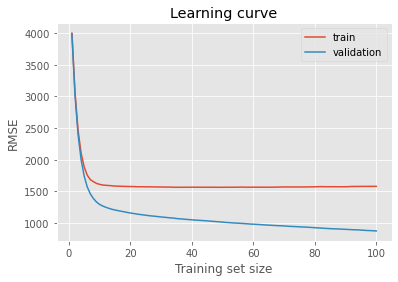

In [ ]:
train_errors = []
val_errors = []

# Loop over the sizes of the training set
for i in range(1,101):
    # Concatenate the models' evaluation results from the first i folds
    train_evals = [models[j].evals_result()['validation_0']['rmse'][:i] for j in range(len(models))]
    val_evals = [models[j].evals_result()['validation_1']['rmse'][:i] for j in range(len(models))]
    
    # Compute the mean and standard deviation of the evaluation results at each training set size
    train_mean = np.mean(train_evals, axis=0)
    train_std = np.std(train_evals, axis=0)
    val_mean = np.mean(val_evals, axis=0)
    val_std = np.std(val_evals, axis=0)
    
    # Append the mean errors to the lists
    train_errors.append(train_mean[-1])
    val_errors.append(val_mean[-1])
    
# Plot the learning curve
plt.plot(range(1, 101), train_errors, label='train')
plt.plot(range(1, 101), val_errors, label='validation')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curve')
plt.legend()
plt.show()





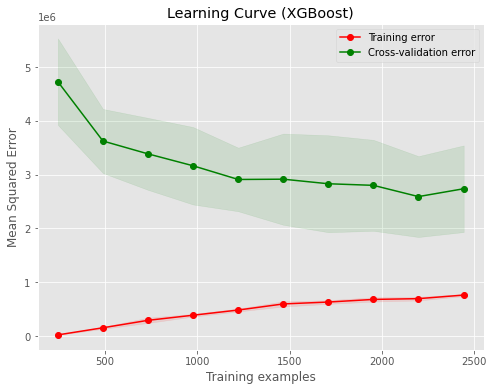

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_mean - valid_std,
                 valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training error")
plt.plot(train_sizes, valid_mean, 'o-', color="g",
         label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Learning Curve (XGBoost)")
plt.show()

In [ ]:
user_id = test["ID"]

model_preds = [model.predict(app_test_encode) for model in models]
model_preds

[array([2678.2932, 3324.8564, 7554.463 , ..., 4114.513 , 3750.1475,
        4778.654 ], dtype=float32),
 array([2718.8513, 2921.1208, 8243.914 , ..., 4400.9478, 3259.5571,
        4690.5854], dtype=float32),
 array([2576.7397, 3352.3645, 7642.4023, ..., 3591.344 , 3787.337 ,
        4706.4604], dtype=float32),
 array([2697.3445, 3191.259 , 8171.2715, ..., 3712.1997, 3190.315 ,
        5796.748 ], dtype=float32),
 array([2496.6108, 3423.7021, 8056.803 , ..., 3613.4924, 3770.2354,
        4921.0493], dtype=float32),
 array([2613.4768, 3328.9893, 7343.8867, ..., 4094.5596, 3052.7625,
        4750.7393], dtype=float32),
 array([2556.3008, 3323.5095, 8309.201 , ..., 3657.6284, 3546.865 ,
        4884.3726], dtype=float32),
 array([2581.7456, 3302.1687, 7756.2246, ..., 4617.6265, 3678.857 ,
        4951.5967], dtype=float32),
 array([2547.5498, 3294.0857, 8062.0464, ..., 3764.9324, 3527.4111,
        4816.4746], dtype=float32),
 array([2597.4739, 3015.313 , 7633.0483, ..., 2932.7227, 3487.19

In [ ]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [ ]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2582
1  2091                 3265
2   585                 7893
3  1455                 7824
4  1801                 2302

In [ ]:
sample_submission.head()

ID  ElapsedTime(second)
0  1669                 2606
1  2091                 3248
2   585                 7877
3  1455                 7830
4  1801                 2275

In [ ]:
sample_submission.shape

(1211, 2)

In [ ]:
sample_submission.to_csv("sample_submission.csv", index = False)

### Private LB best rmse: 1273.2294 - 1st place